#Atividade Bim. Data Science - Análise Exploratória:

Aluno: Matheus Zalamena e Souza  
RGM: 12948128


##Inicialização do DataFrame e limpeza de dados

###Fazendo a "montagem" do Drive


In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Leitura do arquivo .csv e  importação das bibliotecas
A planilha escolhida para ser utilizada como DataFrame foi `2022-09-06_Sistema_E-Saude_Odontologico_-_Base_de_Dados.csv` "Perfil de atendimento Odontológico nas Unidades Municipais de Saúde de Curitiba", disponibilizado pela Prefeitura de Curitiba via dados abertos.


In [152]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

Foi feita a separação dos espaços com  ";"  e o encoding "latin-1".

In [153]:
df_inicial = pd.read_csv('/content/drive/MyDrive/Notebooks/Teste Trabalho DS/2022-09-06_Sistema_E-Saude_Odontologico_-_Base_de_Dados.csv' , encoding='latin-1', sep=';')
df_inicial

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.



,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional
0,01/03/2022 00:21:15,04/10/1973 00:00:00,F,6,ODONTOLOGICO,2639556,UPA SITIO CERCADO,307020010,ACESSO A POLPA DENTARIA E MEDICACAO (POR DENTE),223208,...,NAO PARTICIPA,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,PINHEIRINHO,Brasileira,7261006,1,1,27408
1,01/03/2022 00:21:15,04/10/1973 00:00:00,F,6,ODONTOLOGICO,2639556,UPA SITIO CERCADO,307020029,CURATIVO DE DEMORA C/ OU S/ PREPARO BIOMECANICO,223208,...,NAO PARTICIPA,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,PINHEIRINHO,Brasileira,7261006,1,1,27408
2,01/03/2022 00:51:43,19/01/1996 00:00:00,M,6,ODONTOLOGICO,2639556,UPA SITIO CERCADO,301060037,ATENDIMENTO DE URGENCIA EM ATENCAO BASICA,223208,...,NAO PARTICIPA,TELEVISAO,ONIBUS,CURITIBA,SITIO CERCADO,Brasileira,10690974,1,1,27408
3,01/03/2022 00:56:28,26/08/1984 00:00:00,F,6,ODONTOLOGICO,2639556,UPA SITIO CERCADO,301060037,ATENDIMENTO DE URGENCIA EM ATENCAO BASICA,223208,...,NAO PARTICIPA,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,SITIO CERCADO,Brasileira,1686439,1,1,27408
4,01/03/2022 02:36:03,29/04/1997 00:00:00,F,6,ODONTOLOGICO,2639556,UPA SITIO CERCADO,101020090,SELAMENTO PROVISORIO DE CAVIDADE DENTARIA,223208,...,NAO PARTICIPA,TELEVISAO,ONIBUS,CURITIBA,BOQUEIRAO,Brasileira,2644291,1,1,27408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249425,02/03/2022 09:07:02,23/04/1998 00:00:00,F,6,ODONTOLOGICO,17515,UMS BACACHERI,307030059,RASPAGEM ALISAMENTO E POLIMENTO SUPRAGENGIVAIS...,322405,...,NAO PARTICIPA,RADIO,ONIBUS,CURITIBA,UBERABA,Brasileira,1100457,1,1,2882
249426,16/03/2022 15:59:44,16/12/1973 00:00:00,F,6,ODONTOLOGICO,17507,UMS BARREIRINHA,307030059,RASPAGEM ALISAMENTO E POLIMENTO SUPRAGENGIVAIS...,322405,...,NAO PARTICIPA,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,BARREIRINHA,Brasileira,518294,1,1,70015
249427,18/03/2022 10:17:49,26/06/2015 00:00:00,M,6,ODONTOLOGICO,16985,UMS DOM BOSCO PSF,101030010,VISITA DOMICILIAR POR PROFISSIONAL DE NIVEL MEDIO,322425,...,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CAMPO DE SANTANA,Brasileira,9269466,1,1,2759
249428,20/05/2022 15:16:25,30/12/2013 00:00:00,M,6,ODONTOLOGICO,17507,UMS BARREIRINHA,101020074,APLICACAO TOPICA DE FLUOR (INDIVIDUAL POR SESSAO),322405,...,NAO PARTICIPA,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,BARREIRINHA,Brasileira,10546321,1,1,70015


Visualização de algumas informações do DataFrame inicial:

In [154]:
df_inicial.head(5)

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional
0,01/03/2022 00:21:15,04/10/1973 00:00:00,F,6,ODONTOLOGICO,2639556,UPA SITIO CERCADO,307020010,ACESSO A POLPA DENTARIA E MEDICACAO (POR DENTE),223208,...,NAO PARTICIPA,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,PINHEIRINHO,Brasileira,7261006,1,1,27408
1,01/03/2022 00:21:15,04/10/1973 00:00:00,F,6,ODONTOLOGICO,2639556,UPA SITIO CERCADO,307020029,CURATIVO DE DEMORA C/ OU S/ PREPARO BIOMECANICO,223208,...,NAO PARTICIPA,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,PINHEIRINHO,Brasileira,7261006,1,1,27408
2,01/03/2022 00:51:43,19/01/1996 00:00:00,M,6,ODONTOLOGICO,2639556,UPA SITIO CERCADO,301060037,ATENDIMENTO DE URGENCIA EM ATENCAO BASICA,223208,...,NAO PARTICIPA,TELEVISAO,ONIBUS,CURITIBA,SITIO CERCADO,Brasileira,10690974,1,1,27408
3,01/03/2022 00:56:28,26/08/1984 00:00:00,F,6,ODONTOLOGICO,2639556,UPA SITIO CERCADO,301060037,ATENDIMENTO DE URGENCIA EM ATENCAO BASICA,223208,...,NAO PARTICIPA,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,SITIO CERCADO,Brasileira,1686439,1,1,27408
4,01/03/2022 02:36:03,29/04/1997 00:00:00,F,6,ODONTOLOGICO,2639556,UPA SITIO CERCADO,101020090,SELAMENTO PROVISORIO DE CAVIDADE DENTARIA,223208,...,NAO PARTICIPA,TELEVISAO,ONIBUS,CURITIBA,BOQUEIRAO,Brasileira,2644291,1,1,27408


In [155]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249430 entries, 0 to 249429
Data columns (total 42 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Data do Atendimento                           249430 non-null  object 
 1   Data de Nascimento                            249430 non-null  object 
 2   Sexo                                          249430 non-null  object 
 3   Código do Tipo de Unidade                     249430 non-null  int64  
 4   Tipo de Unidade                               249430 non-null  object 
 5   Código da Unidade                             249430 non-null  int64  
 6   Descrição da Unidade                          249430 non-null  object 
 7   Código do Procedimento                        249430 non-null  int64  
 8   Descrição do Procedimento                     249430 non-null  object 
 9   Código do CBO                                 24

###Limpeza dos dados com tratamento dos valores nulos e colunas

Verificando a ocorrência de valores nulos no DataFrame:

In [156]:
df_inicial[df_inicial.isna().any(axis=1)]

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional
0,01/03/2022 00:21:15,04/10/1973 00:00:00,F,6,ODONTOLOGICO,2639556,UPA SITIO CERCADO,307020010,ACESSO A POLPA DENTARIA E MEDICACAO (POR DENTE),223208,...,NAO PARTICIPA,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,PINHEIRINHO,Brasileira,7261006,1,1,27408
1,01/03/2022 00:21:15,04/10/1973 00:00:00,F,6,ODONTOLOGICO,2639556,UPA SITIO CERCADO,307020029,CURATIVO DE DEMORA C/ OU S/ PREPARO BIOMECANICO,223208,...,NAO PARTICIPA,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,PINHEIRINHO,Brasileira,7261006,1,1,27408
2,01/03/2022 00:51:43,19/01/1996 00:00:00,M,6,ODONTOLOGICO,2639556,UPA SITIO CERCADO,301060037,ATENDIMENTO DE URGENCIA EM ATENCAO BASICA,223208,...,NAO PARTICIPA,TELEVISAO,ONIBUS,CURITIBA,SITIO CERCADO,Brasileira,10690974,1,1,27408
3,01/03/2022 00:56:28,26/08/1984 00:00:00,F,6,ODONTOLOGICO,2639556,UPA SITIO CERCADO,301060037,ATENDIMENTO DE URGENCIA EM ATENCAO BASICA,223208,...,NAO PARTICIPA,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,SITIO CERCADO,Brasileira,1686439,1,1,27408
4,01/03/2022 02:36:03,29/04/1997 00:00:00,F,6,ODONTOLOGICO,2639556,UPA SITIO CERCADO,101020090,SELAMENTO PROVISORIO DE CAVIDADE DENTARIA,223208,...,NAO PARTICIPA,TELEVISAO,ONIBUS,CURITIBA,BOQUEIRAO,Brasileira,2644291,1,1,27408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249425,02/03/2022 09:07:02,23/04/1998 00:00:00,F,6,ODONTOLOGICO,17515,UMS BACACHERI,307030059,RASPAGEM ALISAMENTO E POLIMENTO SUPRAGENGIVAIS...,322405,...,NAO PARTICIPA,RADIO,ONIBUS,CURITIBA,UBERABA,Brasileira,1100457,1,1,2882
249426,16/03/2022 15:59:44,16/12/1973 00:00:00,F,6,ODONTOLOGICO,17507,UMS BARREIRINHA,307030059,RASPAGEM ALISAMENTO E POLIMENTO SUPRAGENGIVAIS...,322405,...,NAO PARTICIPA,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,BARREIRINHA,Brasileira,518294,1,1,70015
249427,18/03/2022 10:17:49,26/06/2015 00:00:00,M,6,ODONTOLOGICO,16985,UMS DOM BOSCO PSF,101030010,VISITA DOMICILIAR POR PROFISSIONAL DE NIVEL MEDIO,322425,...,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CAMPO DE SANTANA,Brasileira,9269466,1,1,2759
249428,20/05/2022 15:16:25,30/12/2013 00:00:00,M,6,ODONTOLOGICO,17507,UMS BARREIRINHA,101020074,APLICACAO TOPICA DE FLUOR (INDIVIDUAL POR SESSAO),322405,...,NAO PARTICIPA,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,BARREIRINHA,Brasileira,10546321,1,1,70015


Sabendo que há mais de 40 colunas e várias ocorrências de valores nulos, vamos remover algumas colunas com valores nulos e colunas que não são de interesse da análise.

In [157]:
col_nulos = [
    'Código do CID', 'Código do Tipo de Unidade', 'Em Caso de Doença', 'Código da Unidade', 'Descrição do CID', 'Abastecimento', 'Data do Internamento', 'Código do CBO', 'Código do Procedimento', 'Estabelecimento Solicitante', 'Estabelecimento Destino', 'CID do Internamento', 'Tratamento no Domicílio', 'Grupo Comunitário', 'cod_usuario', 'cod_profissional', 'origem_usuario', 'residente', 'Qtde Dispensada Farmácia Curitibana', 'Qtde de Medicamento Não Padronizado', 'Encaminhamento para Atendimento Especialista'

]

In [158]:
df_filtrado = df_inicial.drop(columns = col_nulos)

In [159]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249430 entries, 0 to 249429
Data columns (total 21 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Data do Atendimento                 249430 non-null  object 
 1   Data de Nascimento                  249430 non-null  object 
 2   Sexo                                249430 non-null  object 
 3   Tipo de Unidade                     249430 non-null  object 
 4   Descrição da Unidade                249430 non-null  object 
 5   Descrição do Procedimento           249430 non-null  object 
 6   Descrição do CBO                    249430 non-null  object 
 7   Solicitação de Exames               249430 non-null  object 
 8   Qtde Prescrita Farmácia Curitibana  249430 non-null  int64  
 9   Área de Atuação                     10915 non-null   object 
 10  Desencadeou Internamento            249430 non-null  object 
 11  Energia Elétrica          

In [160]:
df_filtrado[df_filtrado['Área de Atuação'].isna()]

,Data do Atendimento,Data de Nascimento,Sexo,Tipo de Unidade,Descrição da Unidade,Descrição do Procedimento,Descrição do CBO,Solicitação de Exames,Qtde Prescrita Farmácia Curitibana,Área de Atuação,...,Energia Elétrica,Tipo de Habitação,Destino Lixo,Fezes/Urina,Cômodos,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade
0,01/03/2022 00:21:15,04/10/1973 00:00:00,F,ODONTOLOGICO,UPA SITIO CERCADO,ACESSO A POLPA DENTARIA E MEDICACAO (POR DENTE),CIRURGIAO DENTISTA CLINICO GERAL,Nao,0,NaN,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,3.0,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,PINHEIRINHO,Brasileira
1,01/03/2022 00:21:15,04/10/1973 00:00:00,F,ODONTOLOGICO,UPA SITIO CERCADO,CURATIVO DE DEMORA C/ OU S/ PREPARO BIOMECANICO,CIRURGIAO DENTISTA CLINICO GERAL,Nao,0,NaN,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,3.0,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,PINHEIRINHO,Brasileira
2,01/03/2022 00:51:43,19/01/1996 00:00:00,M,ODONTOLOGICO,UPA SITIO CERCADO,ATENDIMENTO DE URGENCIA EM ATENCAO BASICA,CIRURGIAO DENTISTA CLINICO GERAL,Nao,0,NaN,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,TELEVISAO,ONIBUS,CURITIBA,SITIO CERCADO,Brasileira
3,01/03/2022 00:56:28,26/08/1984 00:00:00,F,ODONTOLOGICO,UPA SITIO CERCADO,ATENDIMENTO DE URGENCIA EM ATENCAO BASICA,CIRURGIAO DENTISTA CLINICO GERAL,Nao,0,NaN,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,SITIO CERCADO,Brasileira
4,01/03/2022 02:36:03,29/04/1997 00:00:00,F,ODONTOLOGICO,UPA SITIO CERCADO,SELAMENTO PROVISORIO DE CAVIDADE DENTARIA,CIRURGIAO DENTISTA CLINICO GERAL,Nao,16,NaN,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,4.0,TELEVISAO,ONIBUS,CURITIBA,BOQUEIRAO,Brasileira
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249425,02/03/2022 09:07:02,23/04/1998 00:00:00,F,ODONTOLOGICO,UMS BACACHERI,RASPAGEM ALISAMENTO E POLIMENTO SUPRAGENGIVAIS...,TECNICO EM SAUDE BUCAL,Nao,0,NaN,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,RADIO,ONIBUS,CURITIBA,UBERABA,Brasileira
249426,16/03/2022 15:59:44,16/12/1973 00:00:00,F,ODONTOLOGICO,UMS BARREIRINHA,RASPAGEM ALISAMENTO E POLIMENTO SUPRAGENGIVAIS...,TECNICO EM SAUDE BUCAL,Nao,0,NaN,...,Sim,MADEIRA APARELHADA,COLETADO,SISTEMA DE ESGOTO,7.0,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,BARREIRINHA,Brasileira
249427,18/03/2022 10:17:49,26/06/2015 00:00:00,M,ODONTOLOGICO,UMS DOM BOSCO PSF,VISITA DOMICILIAR POR PROFISSIONAL DE NIVEL MEDIO,TECNICO EM SAUDE BUCAL DA ESTRATEGIA DE SAUDE ...,Nao,0,NaN,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CAMPO DE SANTANA,Brasileira
249428,20/05/2022 15:16:25,30/12/2013 00:00:00,M,ODONTOLOGICO,UMS BARREIRINHA,APLICACAO TOPICA DE FLUOR (INDIVIDUAL POR SESSAO),TECNICO EM SAUDE BUCAL,Nao,0,NaN,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,8.0,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,BARREIRINHA,Brasileira


Como foram obtidos muitos valores 'NaN' na coluna de Area de atuação, houve a substituição para "Não informado" nos campos vazios.


In [161]:
df_filtrado['Área de Atuação'] = df_filtrado['Área de Atuação'].fillna('Não informado')
df_filtrado.head(3)

,Data do Atendimento,Data de Nascimento,Sexo,Tipo de Unidade,Descrição da Unidade,Descrição do Procedimento,Descrição do CBO,Solicitação de Exames,Qtde Prescrita Farmácia Curitibana,Área de Atuação,...,Energia Elétrica,Tipo de Habitação,Destino Lixo,Fezes/Urina,Cômodos,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade
0,01/03/2022 00:21:15,04/10/1973 00:00:00,F,ODONTOLOGICO,UPA SITIO CERCADO,ACESSO A POLPA DENTARIA E MEDICACAO (POR DENTE),CIRURGIAO DENTISTA CLINICO GERAL,Nao,0,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,3.0,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,PINHEIRINHO,Brasileira
1,01/03/2022 00:21:15,04/10/1973 00:00:00,F,ODONTOLOGICO,UPA SITIO CERCADO,CURATIVO DE DEMORA C/ OU S/ PREPARO BIOMECANICO,CIRURGIAO DENTISTA CLINICO GERAL,Nao,0,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,3.0,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,PINHEIRINHO,Brasileira
2,01/03/2022 00:51:43,19/01/1996 00:00:00,M,ODONTOLOGICO,UPA SITIO CERCADO,ATENDIMENTO DE URGENCIA EM ATENCAO BASICA,CIRURGIAO DENTISTA CLINICO GERAL,Nao,0,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,TELEVISAO,ONIBUS,CURITIBA,SITIO CERCADO,Brasileira


In [162]:
#Realizando o mesmo procedimento com o campo "Meio de Transporte"
df_filtrado['Meio de Transporte'] = df_filtrado['Meio de Transporte'].fillna('Não informado')

In [163]:
#Removendo as linhas com pouca ocorrência de nulos nas colunas "Tipo de Habitação", "Destino Lixo", "Fezes/Urina", "Meio de Comunicacao"
df_filtrado = df_filtrado.dropna(subset=['Tipo de Habitação'])
df_filtrado = df_filtrado.dropna(subset=['Destino Lixo'])
df_filtrado = df_filtrado.dropna(subset=['Meio de Comunicacao'])

Renomeando as colunas (Corrigindo erros de digitação,  facilitando o entendimento e padronizando os nomes):

In [164]:
df_filtrado = df_filtrado.rename(columns={'Municício': 'Municipio','Data do Atendimento': 'Data_Atend', 'Descrição do CBO': "Desc_Prof", 'Data de Nascimento' : 'Data_Nasc', "Tipo de Unidade" : "Tipo_Unidade", "Descrição da Unidade" : "Desc_Unidade", "Descrição do Procedimento" : "Desc_Procedimento", "Solicitação de Exames" : "Exames", "Qtde Prescrita Farmácia Curitibana" : "Qtd_Medic_Prescritos", "Área de Atuação" : "Area_Atuacao", 'Desencadeou Internamento' : "Causou_Internamento", "Energia Elétrica" : "Energia_Eletrica", "Tipo de Habitação" : 'Tipo_Habitacao', 'Destino Lixo' : "Destino_Lixo", 'Fezes/Urina' : "Dest_Fezes/Urina", "Meio de Comunicacao" : "Meio_Comunic", "Cômodos" : "Qtd_Comodos", "Meio de Transporte" : "Meio_Transp" })
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234041 entries, 0 to 249429
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Data_Atend            234041 non-null  object 
 1   Data_Nasc             234041 non-null  object 
 2   Sexo                  234041 non-null  object 
 3   Tipo_Unidade          234041 non-null  object 
 4   Desc_Unidade          234041 non-null  object 
 5   Desc_Procedimento     234041 non-null  object 
 6   Desc_Prof             234041 non-null  object 
 7   Exames                234041 non-null  object 
 8   Qtd_Medic_Prescritos  234041 non-null  int64  
 9   Area_Atuacao          234041 non-null  object 
 10  Causou_Internamento   234041 non-null  object 
 11  Energia_Eletrica      234041 non-null  object 
 12  Tipo_Habitacao        234041 non-null  object 
 13  Destino_Lixo          234041 non-null  object 
 14  Dest_Fezes/Urina      234040 non-null  object 
 15  

In [165]:
#Identificando onde há valor nulo da Coluna de Saneamento "Dest_Fezes/Urina"
df_filtrado[df_filtrado['Dest_Fezes/Urina'].isna()]

,Data_Atend,Data_Nasc,Sexo,Tipo_Unidade,Desc_Unidade,Desc_Procedimento,Desc_Prof,Exames,Qtd_Medic_Prescritos,Area_Atuacao,...,Energia_Eletrica,Tipo_Habitacao,Destino_Lixo,Dest_Fezes/Urina,Qtd_Comodos,Meio_Comunic,Meio_Transp,Municipio,Bairro,Nacionalidade
4936,06/03/2022 14:01:08,18/07/1972 00:00:00,M,ODONTOLOGICO,UPA BOA VISTA,SELAMENTO PROVISORIO DE CAVIDADE DENTARIA,CIRURGIAO DENTISTA CLINICO GERAL,Nao,0,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,NaN,10.0,OUTROS,CARRO,CURITIBA,JUVEVE,Brasileira


In [166]:
#Removendo a única linha identificada acima
df_filtrado = df_filtrado.drop(4936)

In [167]:
#Corrigindo a formatação da coluna de Data de Nascimento para o formato correto de data
df_filtrado['Data_Nasc'] = pd.to_datetime(df_filtrado['Data_Nasc']).dt.date
df_filtrado['Data_Nasc'] = pd.to_datetime(df_filtrado['Data_Nasc'], format='%Y-%m-%d')



In [168]:
#Fazendo o mesmo procedimento acima para a coluna de Data de Atendimento
df_filtrado['Data_Atend'] = pd.to_datetime(df_filtrado['Data_Atend']).dt.date
df_filtrado['Data_Atend'] = pd.to_datetime(df_filtrado['Data_Atend'], format='%Y-%m-%d')

df_filtrado.head(3)

,Data_Atend,Data_Nasc,Sexo,Tipo_Unidade,Desc_Unidade,Desc_Procedimento,Desc_Prof,Exames,Qtd_Medic_Prescritos,Area_Atuacao,...,Energia_Eletrica,Tipo_Habitacao,Destino_Lixo,Dest_Fezes/Urina,Qtd_Comodos,Meio_Comunic,Meio_Transp,Municipio,Bairro,Nacionalidade
0,2022-01-03,1973-04-10,F,ODONTOLOGICO,UPA SITIO CERCADO,ACESSO A POLPA DENTARIA E MEDICACAO (POR DENTE),CIRURGIAO DENTISTA CLINICO GERAL,Nao,0,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,3.0,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,PINHEIRINHO,Brasileira
1,2022-01-03,1973-04-10,F,ODONTOLOGICO,UPA SITIO CERCADO,CURATIVO DE DEMORA C/ OU S/ PREPARO BIOMECANICO,CIRURGIAO DENTISTA CLINICO GERAL,Nao,0,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,3.0,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,PINHEIRINHO,Brasileira
2,2022-01-03,1996-01-19,M,ODONTOLOGICO,UPA SITIO CERCADO,ATENDIMENTO DE URGENCIA EM ATENCAO BASICA,CIRURGIAO DENTISTA CLINICO GERAL,Nao,0,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,5.0,TELEVISAO,ONIBUS,CURITIBA,SITIO CERCADO,Brasileira


In [169]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234040 entries, 0 to 249429
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Data_Atend            234040 non-null  datetime64[ns]
 1   Data_Nasc             234040 non-null  datetime64[ns]
 2   Sexo                  234040 non-null  object        
 3   Tipo_Unidade          234040 non-null  object        
 4   Desc_Unidade          234040 non-null  object        
 5   Desc_Procedimento     234040 non-null  object        
 6   Desc_Prof             234040 non-null  object        
 7   Exames                234040 non-null  object        
 8   Qtd_Medic_Prescritos  234040 non-null  int64         
 9   Area_Atuacao          234040 non-null  object        
 10  Causou_Internamento   234040 non-null  object        
 11  Energia_Eletrica      234040 non-null  object        
 12  Tipo_Habitacao        234040 non-null  object        
 13 

In [170]:
#Verificando se há necessidade de ajustar nome dos bairros:
df_filtrado['Bairro'].unique()

array(['PINHEIRINHO', 'SITIO CERCADO', 'BOQUEIRAO', 'UBERABA',
       'CIDADE INDUSTRIAL', 'ATUBA', 'CAMPO COMPRIDO', 'REBOUCAS',
       'TATUQUARA', 'SANTA CANDIDA', 'CAMPO DE SANTANA', 'AUGUSTA',
       'FANNY', 'BAIRRO ALTO', 'CAXIMBA', 'CAPAO RASO', 'GANCHINHO',
       'SAO BRAZ', 'CAJURU', 'SANTA QUITERIA', 'FAZENDINHA',
       'ALTO BOQUEIRAO', 'AGUA VERDE', 'BARREIRINHA', 'PRADO VELHO',
       'UMBARA', 'XAXIM', 'NOVO MUNDO', 'ABRANCHES', 'TINGUI',
       'SAO MIGUEL', 'LINDOIA', 'PORTAO', 'BUTIATUVINHA',
       'CAPAO DA IMBUIA', 'BIGORRILHO', 'PILARZINHO', 'GUAIRA',
       'GUABIROTUBA', 'TARUMA', 'SANTO INACIO', 'BOA VISTA', 'CACHOEIRA',
       'ORLEANS', 'BACACHERI', 'CENTRO', 'TABOAO', 'VISTA ALEGRE',
       'CRISTO REI', 'MERCES', 'SANTA FELICIDADE', 'SOLITUDE', 'JUVEVE',
       'SAO LOURENCO', 'CASCATINHA', 'HAUER', 'PAROLIN',
       'JARDIM BOTANICO', 'CENTRO CIVICO', 'ALTO DA GLORIA', 'AHU',
       'VILA IZABEL', 'SAO FRANCISCO', 'LAMENHA PEQUENA',
       'JARDIM DAS AM

Os nomes dos bairros já estavam corretamente padronizados e formatados! 🙂

In [171]:
df_filtrado['Municipio'].unique()

array(['CURITIBA', 'CAMPO LARGO', 'SAO PAULO', 'ARAUCARIA',
       'FAZENDA RIO GRANDE', 'PIRAQUARA', 'ANTONIO OLINTO', 'PIEN',
       'PINHAIS', 'COLOMBO', 'ALMIRANTE TAMANDARE', 'SANTANA DO ITARARE',
       'NAO INFORMADO', 'SAO JOSE DOS PINHAIS', 'GUARATUBA',
       'PONTAL DO PARANA', 'MORRETES'], dtype=object)

In [172]:
#Verificando se os nomes das Unidades de Saúde são compreensíveis
df_filtrado['Tipo_Unidade'].unique()

array(['ODONTOLOGICO', 'BASICO', 'CEO'], dtype=object)

In [173]:
#Renomeando todos as ocorrências das Unidades "CEO" para "CENTRO DE ESPECIALIDADES ODONTOLOGICAS"
df_filtrado['Tipo_Unidade'] = df_filtrado['Tipo_Unidade'].replace('CEO', 'CENTRO DE ESPECIALIDADES ODONTOLOGICAS')
df_filtrado['Tipo_Unidade'].unique()

array(['ODONTOLOGICO', 'BASICO', 'CENTRO DE ESPECIALIDADES ODONTOLOGICAS'],
      dtype=object)

In [174]:
df_filtrado['Qtd_Comodos'] = df_filtrado['Qtd_Comodos'].astype(int)

###Filtrando e agrupando as descrições de procedimentos dentários

In [175]:
#Verificando o nome dos procedimentos para possíveis agrupamentos
df_filtrado['Desc_Procedimento'].unique()

array(['ACESSO A POLPA DENTARIA E MEDICACAO (POR DENTE)',
       'CURATIVO DE DEMORA C/ OU S/ PREPARO BIOMECANICO',
       'ATENDIMENTO DE URGENCIA EM ATENCAO BASICA',
       'SELAMENTO PROVISORIO DE CAVIDADE DENTARIA',
       'RADIOGRAFIA PERIAPICAL',
       'TRATAMENTO ENDODONTICO DE DENTE PERMANENTE COM TRES OU MAIS RAIZES',
       'RADIOGRAFIA INTERPROXIMAL (BITE WING)',
       'PRIMEIRA CONSULTA ODONTOLOGICA PROGRAMATICA',
       'TRATAMENTO ENDODONTICO DE DENTE PERMANENTE UNIRRADICULAR',
       'CAPEAMENTO PULPAR',
       'MOLDAGEM DENTO-GENGIVAL P/ CONSTRUCAO DE PROTESE DENTARIA',
       'RESTAURACAO DE DENTE PERMANENTE ANTERIOR COM RESINA COMPOSTA',
       'ORIENTACAO DE HIGIENE BUCAL',
       'RESTAURACAO DE DENTE PERMANENTE POSTERIOR COM RESINA COMPOSTA',
       'EXAME PARA DETECÇÃO DE LESÕES BUCAIS',
       'EXODONTIA DE DENTE DECIDUO', 'EVIDENCIACAO DE PLACA BACTERIANA',
       'RASPAGEM ALISAMENTO E POLIMENTO SUPRAGENGIVAIS (POR SEXTANTE)',
       'EXODONTIA DE DENTE PERMA

In [176]:
#Criando divisões no DataFrame para agrupar os procedimentos
verif_proced1 = df_filtrado[df_filtrado['Desc_Procedimento'].str.contains('RADIOGRAFIA')]
verif_proced1['Desc_Procedimento'].unique()

array(['RADIOGRAFIA PERIAPICAL', 'RADIOGRAFIA INTERPROXIMAL (BITE WING)',
       'RADIOGRAFIA OCLUSAL', 'RADIOGRAFIA PANORAMICA'], dtype=object)

In [177]:
df_filtrado['Desc_Procedimento'] = df_filtrado['Desc_Procedimento'].replace(['RADIOGRAFIA PERIAPICAL', 'RADIOGRAFIA INTERPROXIMAL (BITE WING)',
       'RADIOGRAFIA OCLUSAL', 'RADIOGRAFIA PANORAMICA'], 'RADIOGRAFIA')

In [178]:
verif_proced2 = df_filtrado[df_filtrado['Desc_Procedimento'].str.contains('TRATAMENTO ENDODONTICO')]
verif_proced2['Desc_Procedimento'].unique()

array(['TRATAMENTO ENDODONTICO DE DENTE PERMANENTE COM TRES OU MAIS RAIZES',
       'TRATAMENTO ENDODONTICO DE DENTE PERMANENTE UNIRRADICULAR',
       'TRATAMENTO ENDODONTICO DE DENTE PERMANENTE BIRRADICULAR',
       'TRATAMENTO ENDODONTICO DE DENTE DECIDUO',
       'RETRATAMENTO ENDODONTICO EM DENTE PERMANENTE UNI-RADICULAR',
       'RETRATAMENTO ENDODONTICO EM DENTE PERMANENTE COM 3 OU MAIS RAIZES',
       'RETRATAMENTO ENDODONTICO EM DENTE PERMANENTE BI-RADICULAR'],
      dtype=object)

In [179]:
df_filtrado['Desc_Procedimento'] = df_filtrado['Desc_Procedimento'].replace(['TRATAMENTO ENDODONTICO DE DENTE PERMANENTE COM TRES OU MAIS RAIZES',
       'TRATAMENTO ENDODONTICO DE DENTE PERMANENTE UNIRRADICULAR',
       'TRATAMENTO ENDODONTICO DE DENTE PERMANENTE BIRRADICULAR',
       'TRATAMENTO ENDODONTICO DE DENTE DECIDUO',
       'RETRATAMENTO ENDODONTICO EM DENTE PERMANENTE UNI-RADICULAR',
       'RETRATAMENTO ENDODONTICO EM DENTE PERMANENTE COM 3 OU MAIS RAIZES',
       'RETRATAMENTO ENDODONTICO EM DENTE PERMANENTE BI-RADICULAR'], 'TRATAMENTO ENDODONTICO')

In [180]:
verif_proced3 = df_filtrado[df_filtrado['Desc_Procedimento'].str.contains('RESTAURACAO')]
verif_proced3['Desc_Procedimento'].unique()

array(['RESTAURACAO DE DENTE PERMANENTE ANTERIOR COM RESINA COMPOSTA',
       'RESTAURACAO DE DENTE PERMANENTE POSTERIOR COM RESINA COMPOSTA',
       'RESTAURACAO DE DENTE DECIDUO POSTERIOR COM IONOMERO DE VIDRO',
       'RESTAURACAO COM AMALGAMA DE DENTE PERMANENTE POSTERIOR',
       'RESTAURACAO DE DENTE DECIDUO ANTERIOR COM RESINA COMPOSTA.',
       'RESTAURACAO DE DENTE DECIDUO POSTERIOR COM RESINA COMPOSTA',
       'RESTAURACAO DE DENTE DECIDUO POSTERIOR COM AMALGAMA'],
      dtype=object)

In [181]:
df_filtrado['Desc_Procedimento'] = df_filtrado['Desc_Procedimento'].replace(['RESTAURACAO DE DENTE PERMANENTE ANTERIOR COM RESINA COMPOSTA',
       'RESTAURACAO DE DENTE PERMANENTE POSTERIOR COM RESINA COMPOSTA',
       'RESTAURACAO DE DENTE DECIDUO POSTERIOR COM IONOMERO DE VIDRO',
       'RESTAURACAO COM AMALGAMA DE DENTE PERMANENTE POSTERIOR',
       'RESTAURACAO DE DENTE DECIDUO ANTERIOR COM RESINA COMPOSTA.',
       'RESTAURACAO DE DENTE DECIDUO POSTERIOR COM RESINA COMPOSTA',
       'RESTAURACAO DE DENTE DECIDUO POSTERIOR COM AMALGAMA'], 'RESTAURACAO DENTARIA')

In [182]:
verif_proced4 = df_filtrado[df_filtrado['Desc_Procedimento'].str.contains('CONSULTA')]
verif_proced4['Desc_Procedimento'].unique()

array(['PRIMEIRA CONSULTA ODONTOLOGICA PROGRAMATICA',
       'CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO PRIMARIA (EXCETO MEDICO)',
       'CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO ESPECIALIZADA (EXCETO MEDICO)',
       'TELECONSULTA NA ATENCAO PRIMARIA',
       'CONSULTA/ATENDIMENTO DOMICILIAR',
       'CONSULTA PARA AVALIACAO CLINICA DO FUMANTE'], dtype=object)

In [183]:
df_filtrado['Desc_Procedimento'] = df_filtrado['Desc_Procedimento'].replace(['PRIMEIRA CONSULTA ODONTOLOGICA PROGRAMATICA',
       'CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO PRIMARIA (EXCETO MEDICO)',
       'CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA ATENCAO ESPECIALIZADA (EXCETO MEDICO)',
       'TELECONSULTA NA ATENCAO PRIMARIA',
       'CONSULTA/ATENDIMENTO DOMICILIAR',
       'CONSULTA PARA AVALIACAO CLINICA DO FUMANTE'], 'CONSULTA/TELECONSULTA')

In [184]:
verif_proced5 = df_filtrado[df_filtrado['Desc_Procedimento'].str.contains('ORIENTACAO')]
verif_proced5['Desc_Procedimento'].unique()

array(['ORIENTACAO DE HIGIENE BUCAL',
       'ORIENTACAO DE HIGIENIZACAO DE PROTESES DENTARIAS'], dtype=object)

In [185]:
df_filtrado['Desc_Procedimento'] = df_filtrado['Desc_Procedimento'].replace(['ORIENTACAO DE HIGIENE BUCAL',
       'ORIENTACAO DE HIGIENIZACAO DE PROTESES DENTARIAS'], 'ORIENTACAO DE HIGIENE')

In [186]:
verif_proced6 = df_filtrado[df_filtrado['Desc_Procedimento'].str.contains('AVALIACAO')]
verif_proced6['Desc_Procedimento'].unique()

array(['AVALIACAO MULTIDIMENSIONAL DA PESSOA IDOSA',
       'AVALIACAO DO CRESCIMENTO NA PUERICULTURA',
       'AVALIACAO ANTROPOMETRICA'], dtype=object)

In [187]:
df_filtrado['Desc_Procedimento'] = df_filtrado['Desc_Procedimento'].replace(['AVALIACAO MULTIDIMENSIONAL DA PESSOA IDOSA',
       'CONSULTA PARA AVALIACAO CLINICA DO FUMANTE',
       'AVALIACAO DO CRESCIMENTO NA PUERICULTURA',
       'AVALIACAO ANTROPOMETRICA'], 'AVALIACAO NO GERAL')

In [188]:
verif_proced7 = df_filtrado[df_filtrado['Desc_Procedimento'].str.contains('EXODONTIA')]
verif_proced7['Desc_Procedimento'].unique()

array(['EXODONTIA DE DENTE DECIDUO', 'EXODONTIA DE DENTE PERMANENTE',
       'EXODONTIA DE DENTE SUPRANUMERARIO'], dtype=object)

In [189]:
df_filtrado['Desc_Procedimento'] = df_filtrado['Desc_Procedimento'].replace(['EXODONTIA DE DENTE DECIDUO', 'EXODONTIA DE DENTE PERMANENTE',
       'EXODONTIA DE DENTE SUPRANUMERARIO'], 'EXODONTIA')

In [190]:
verif_proced8 = df_filtrado[df_filtrado['Desc_Procedimento'].str.contains('CORRECAO')]
verif_proced8['Desc_Procedimento'].unique()

array(['CORRECAO DE TUBEROSIDADE DO MAXILAR',
       'CORRECAO DE IRREGULARIDADES DE REBORDO ALVEOLAR',
       'CORRECAO DE BRIDAS MUSCULARES'], dtype=object)

In [191]:
df_filtrado['Desc_Procedimento'] = df_filtrado['Desc_Procedimento'].replace(['CORRECAO DE TUBEROSIDADE DO MAXILAR',
       'CORRECAO DE IRREGULARIDADES DE REBORDO ALVEOLAR',
       'CORRECAO DE BRIDAS MUSCULARES'], 'CORRECAO DENTARIA')

In [192]:
verif_proced9 = df_filtrado[df_filtrado['Desc_Procedimento'].str.contains('BIOPSIA')]
verif_proced9['Desc_Procedimento'].unique()

array(['BIOPSIA DOS TECIDOS MOLES DA BOCA',
       'BIOPSIA DE OSSO DO CRANIO E DA FACE',
       'BIOPSIA DE GLANDULA SALIVAR'], dtype=object)

In [193]:
df_filtrado['Desc_Procedimento'] = df_filtrado['Desc_Procedimento'].replace(['BIOPSIA DOS TECIDOS MOLES DA BOCA',
       'BIOPSIA DE OSSO DO CRANIO E DA FACE',
       'BIOPSIA DE GLANDULA SALIVAR'], 'BIOPSIA')

In [194]:
verif_proced10 = df_filtrado[df_filtrado['Desc_Procedimento'].str.contains('ATENDIMENTO')]
verif_proced10['Desc_Procedimento'].unique()

array(['ATENDIMENTO DE URGENCIA EM ATENCAO BASICA',
       'ABORDAGEM COGNITIVA COMPORTAMENTAL DO FUMANTE (POR ATENDIMENTO / PACIENTE)',
       'ATENDIMENTO DE PACIENTE EM CUIDADOS PALIATIVOS',
       'ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA'], dtype=object)

In [195]:
df_filtrado['Desc_Procedimento'] = df_filtrado['Desc_Procedimento'].replace(['ATENDIMENTO DE URGENCIA EM ATENCAO BASICA',
       'ABORDAGEM COGNITIVA COMPORTAMENTAL DO FUMANTE (POR ATENDIMENTO / PACIENTE)',
       'ATENDIMENTO DE PACIENTE EM CUIDADOS PALIATIVOS',
       'ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA'], 'ATENDIMENTO COMUM OU DE URGENCIA')

In [196]:
verif_proced11 = df_filtrado[df_filtrado['Desc_Procedimento'].str.contains('VISITA')]
verif_proced11['Desc_Procedimento'].unique()

array(['VISITA DOMICILIAR POR PROFISSIONAL DE NIVEL MEDIO',
       'VISITA DOMICILIAR/INSTITUCIONAL POR PROFISSIONAL DE NIVEL SUPERIOR'],
      dtype=object)

In [197]:
df_filtrado['Desc_Procedimento'] = df_filtrado['Desc_Procedimento'].replace(['VISITA DOMICILIAR POR PROFISSIONAL DE NIVEL MEDIO',
       'VISITA DOMICILIAR/INSTITUCIONAL POR PROFISSIONAL DE NIVEL SUPERIOR'], 'VISITA DOMICILIAR')

In [198]:
verif_proced12 = df_filtrado[df_filtrado['Desc_Procedimento'].str.contains('TRATAMENTO')]
verif_proced12['Desc_Procedimento'].unique()

array(['TRATAMENTO ENDODONTICO',
       'TRATAMENTO RESTAURADOR ATRAUMATICO (TRA/ART)',
       'TRATAMENTO DE ALVEOLITE', 'TRATAMENTO DE PERICORONARITE',
       'TRATAMENTO INICIAL DO DENTE TRAUMATIZADO',
       'TRATAMENTO CIRURGICO PERIODONTAL (POR SEXTANTE)',
       'TRATAMENTO DE NEVRALGIAS FACIAIS',
       'TRATAMENTO DE LESOES DA MUCOSA ORAL',
       'TRATAMENTO CIRURGICO DE HEMORRAGIA BUCO-DENTAL',
       'TRATAMENTO DE GENGIVITE ULCERATIVA NECROSANTE AGUDA (GUNA)'],
      dtype=object)

In [199]:
df_filtrado['Desc_Procedimento'] = df_filtrado['Desc_Procedimento'].replace(['TRATAMENTO RESTAURADOR ATRAUMATICO (TRA/ART)',
       'TRATAMENTO DE ALVEOLITE', 'TRATAMENTO DE PERICORONARITE',
       'TRATAMENTO INICIAL DO DENTE TRAUMATIZADO',
       'TRATAMENTO CIRURGICO PERIODONTAL (POR SEXTANTE)',
       'TRATAMENTO DE NEVRALGIAS FACIAIS',
       'TRATAMENTO DE LESOES DA MUCOSA ORAL',
       'TRATAMENTO CIRURGICO DE HEMORRAGIA BUCO-DENTAL',
       'TRATAMENTO DE GENGIVITE ULCERATIVA NECROSANTE AGUDA (GUNA)'], 'TRATAMENTO INICIAL, LESIONAL OU CIRURGICO')

In [200]:
verif_proced12 = df_filtrado[df_filtrado['Desc_Procedimento'].str.contains('APARELHO')]
verif_proced12['Desc_Procedimento'].unique()

array(['MANUTENCAO/CONSERTO DE APARELHO ORTODONTICO/ORTOPEDICO',
       'APARELHO ORTOPEDICO E ORTODONTICO REMOVIVEL'], dtype=object)

In [201]:
df_filtrado['Desc_Procedimento'] = df_filtrado['Desc_Procedimento'].replace(['MANUTENCAO/CONSERTO DE APARELHO ORTODONTICO/ORTOPEDICO',
       'APARELHO ORTOPEDICO E ORTODONTICO REMOVIVEL'], 'INSTALACAO/MANUTENCAO DE APARELHO')

In [202]:
verif_proced12 = df_filtrado[df_filtrado['Desc_Procedimento'].str.contains('RASPAGEM')]
verif_proced12['Desc_Procedimento'].unique()

array(['RASPAGEM ALISAMENTO E POLIMENTO SUPRAGENGIVAIS (POR SEXTANTE)',
       'RASPAGEM ALISAMENTO SUBGENGIVAIS (POR SEXTANTE)',
       'RASPAGEM CORONO-RADICULAR (POR SEXTANTE)'], dtype=object)

In [203]:
df_filtrado['Desc_Procedimento'] = df_filtrado['Desc_Procedimento'].replace(['RASPAGEM ALISAMENTO E POLIMENTO SUPRAGENGIVAIS (POR SEXTANTE)',
       'RASPAGEM ALISAMENTO SUBGENGIVAIS (POR SEXTANTE)',
       'RASPAGEM CORONO-RADICULAR (POR SEXTANTE)'], 'RASPAGEM E ALISAMENTO')

In [204]:
verif_proced12 = df_filtrado[df_filtrado['Desc_Procedimento'].str.contains('EXCISAO')]
verif_proced12['Desc_Procedimento'].unique()

array(['EXCISAO E/OU SUTURA SIMPLES DE PEQUENAS LESOES / FERIMENTOS DE PELE / ANEXOS E MUCOSA',
       'EXCISAO E SUTURA DE LESAO NA BOCA',
       'EXCISAO DE RANULA OU FENOMENO DE RETENCAO SALIVAR'], dtype=object)

In [205]:
df_filtrado['Desc_Procedimento'] = df_filtrado['Desc_Procedimento'].replace(['EXCISAO E/OU SUTURA SIMPLES DE PEQUENAS LESOES / FERIMENTOS DE PELE / ANEXOS E MUCOSA',
       'EXCISAO E SUTURA DE LESAO NA BOCA',
       'EXCISAO DE RANULA OU FENOMENO DE RETENCAO SALIVAR'], 'EXCISAO')

In [206]:
df_filtrado['Desc_Procedimento'].unique()

array(['ACESSO A POLPA DENTARIA E MEDICACAO (POR DENTE)',
       'CURATIVO DE DEMORA C/ OU S/ PREPARO BIOMECANICO',
       'ATENDIMENTO COMUM OU DE URGENCIA',
       'SELAMENTO PROVISORIO DE CAVIDADE DENTARIA', 'RADIOGRAFIA',
       'TRATAMENTO ENDODONTICO', 'CONSULTA/TELECONSULTA',
       'CAPEAMENTO PULPAR',
       'MOLDAGEM DENTO-GENGIVAL P/ CONSTRUCAO DE PROTESE DENTARIA',
       'RESTAURACAO DENTARIA', 'ORIENTACAO DE HIGIENE',
       'EXAME PARA DETECÇÃO DE LESÕES BUCAIS', 'EXODONTIA',
       'EVIDENCIACAO DE PLACA BACTERIANA', 'RASPAGEM E ALISAMENTO',
       'PROFILAXIA / REMOCAO DA PLACA BACTERIANA',
       'ODONTOSECCAO / RADILECTOMIA / TUNELIZACAO',
       'TRATAMENTO INICIAL, LESIONAL OU CIRURGICO',
       'APLICACAO DE SELANTE (POR DENTE)', 'AJUSTE OCLUSAL',
       'APLICACAO TOPICA DE FLUOR (INDIVIDUAL POR SESSAO)',
       'ADAPTACAO DE PROTESE DENTARIA',
       'RETIRADA DE PONTOS DE CIRURGIAS (POR PACIENTE)',
       'REMOCAO DE DENTE RETIDO (INCLUSO / IMPACTADO)',
       

###Verificando e organizando o resto das colunas

In [207]:
df_filtrado['Causou_Internamento'].unique()

array(['Nao'], dtype=object)

In [208]:
#Agrupando e renomeando campos da coluna de Tipo de Habitação para facilitar o entendimento
df_filtrado['Tipo_Habitacao'].unique()

array(['TIJOLO/ALVENARIA COM REVESTIMENTO', 'MADEIRA APARELHADA',
       'TIJOLO ALVENARIA SEM REVESTIMENTO', 'OUTRO MATERIAL', 'PALHA ',
       'TAIPA COM REVESTIMENTO', 'MATERIAL APROVEITADO',
       'TAIPA SEM REVESTIMENTO'], dtype=object)

In [209]:
df_filtrado['Tipo_Habitacao'] = df_filtrado['Tipo_Habitacao'].replace('MATERIAL APROVEITADO', 'OUTRO MATERIAL')

In [210]:
df_filtrado['Tipo_Habitacao'] = df_filtrado['Tipo_Habitacao'].replace('MADEIRA APARELHADA', 'MADEIRA')

In [211]:
df_filtrado['Tipo_Habitacao'].unique()

array(['TIJOLO/ALVENARIA COM REVESTIMENTO', 'MADEIRA',
       'TIJOLO ALVENARIA SEM REVESTIMENTO', 'OUTRO MATERIAL', 'PALHA ',
       'TAIPA COM REVESTIMENTO', 'TAIPA SEM REVESTIMENTO'], dtype=object)

In [212]:
#Agrupando e renomeando campos da coluna de Descrição do Cargo do Profissional para facilitar o entendimento
df_filtrado['Desc_Prof'].unique()

array(['CIRURGIAO DENTISTA CLINICO GERAL',
       'CIRURGIAO DENTISTA ENDODONTISTA',
       'CIRURGIAO DENTISTA DA ESTRATEGIA DE SAUDE DA FAMILIA',
       'TECNICO EM SAUDE BUCAL',
       'TECNICO EM SAUDE BUCAL DA ESTRATEGIA DE SAUDE DA FAMILIA',
       'CIRURGIAO DENTISTA PERIODONTISTA', 'AUXILIAR EM SAUDE BUCAL',
       'AUXILIAR EM SAUDE BUCAL DA ESTRATEGIA DE SAUDE DA FAMILIA'],
      dtype=object)

In [213]:
df_filtrado['Desc_Prof'] = df_filtrado['Desc_Prof'].replace(['CIRURGIAO DENTISTA CLINICO GERAL',
       'CIRURGIAO DENTISTA ENDODONTISTA',
       'CIRURGIAO DENTISTA DA ESTRATEGIA DE SAUDE DA FAMILIA', 'CIRURGIAO DENTISTA PERIODONTISTA'], 'CIRURGIAO DENTISTA')

In [214]:
df_filtrado['Desc_Prof'] = df_filtrado['Desc_Prof'].replace(['TECNICO EM SAUDE BUCAL',
       'TECNICO EM SAUDE BUCAL DA ESTRATEGIA DE SAUDE DA FAMILIA'], 'TECNICO EM SAUDE BUCAL')

In [215]:
df_filtrado['Desc_Prof'] = df_filtrado['Desc_Prof'].replace('AUXILIAR EM SAUDE BUCAL DA ESTRATEGIA DE SAUDE DA FAMILIA', 'AUXILIAR EM SAUDE BUCAL')

In [216]:
df_filtrado['Desc_Prof'].unique()

array(['CIRURGIAO DENTISTA', 'TECNICO EM SAUDE BUCAL',
       'AUXILIAR EM SAUDE BUCAL'], dtype=object)

In [217]:
#Agrupando e renomeando campos da coluna de Meios de Comunicação para facilitar o entendimento
df_filtrado['Meio_Comunic'].unique()

array(['TELEVISAO,RADIO', 'TELEVISAO', 'TELEVISAO,RADIO,OUTROS', 'RADIO',
       'OUTROS', 'TELEVISAO,OUTROS', 'RADIO,OUTROS'], dtype=object)

In [218]:
df_filtrado['Meio_Comunic'] = df_filtrado['Meio_Comunic'].replace(['TELEVISAO,OUTROS', 'RADIO,OUTROS'], 'TELEVISAO,RADIO,OUTROS')

In [219]:
df_filtrado['Meio_Comunic'].unique()

array(['TELEVISAO,RADIO', 'TELEVISAO', 'TELEVISAO,RADIO,OUTROS', 'RADIO',
       'OUTROS'], dtype=object)

In [220]:
#Agrupando e renomeando campos da coluna de Meios de Transporte para facilitar o entendimento
df_filtrado['Meio_Transp'].unique()

array(['ONIBUS,CARRO', 'ONIBUS', 'OUTROS,ONIBUS', 'OUTROS,CARRO',
       'ONIBUS,METRO,CARRO', 'OUTROS', 'OUTROS,ONIBUS,CARRO', 'CARRO',
       'OUTROS,METRO', 'ONIBUS,CAMINHAO', 'OUTROS,ONIBUS,CARRO,CAMINHAO',
       'ONIBUS,CARRO,CAMINHAO', 'OUTROS,ONIBUS,CARROCA,CARRO,CAMINHAO',
       'ONIBUS,CARROCA,CARRO,CAMINHAO', 'METRO', 'CARROCA',
       'OUTROS,CARROCA', 'OUTROS,ONIBUS,METRO,CARROCA,CARRO,CAMINHAO',
       'CAMINHAO', 'OUTROS,ONIBUS,CAMINHAO', 'CARRO,CAMINHAO',
       'ONIBUS,CARROCA,CAMINHAO', 'ONIBUS,CARROCA', 'CARROCA,CARRO',
       'OUTROS,ONIBUS,METRO', 'ONIBUS,METRO', 'Não informado',
       'CARROCA,CAMINHAO', 'METRO,CARRO',
       'OUTROS,ONIBUS,CARROCA,CAMINHAO', 'OUTROS,CARROCA,CAMINHAO',
       'OUTROS,CARRO,CAMINHAO', 'OUTROS,ONIBUS,METRO,CARRO',
       'OUTROS,ONIBUS,CARROCA', 'OUTROS,ONIBUS,CARROCA,CARRO',
       'OUTROS,CAMINHAO', 'ONIBUS,METRO,CARROCA,CARRO,CAMINHAO'],
      dtype=object)

In [221]:
verif_transp = df_filtrado[df_filtrado['Meio_Transp'].str.contains('OUTROS')]
verif_transp['Meio_Transp'].unique()

array(['OUTROS,ONIBUS', 'OUTROS,CARRO', 'OUTROS', 'OUTROS,ONIBUS,CARRO',
       'OUTROS,METRO', 'OUTROS,ONIBUS,CARRO,CAMINHAO',
       'OUTROS,ONIBUS,CARROCA,CARRO,CAMINHAO', 'OUTROS,CARROCA',
       'OUTROS,ONIBUS,METRO,CARROCA,CARRO,CAMINHAO',
       'OUTROS,ONIBUS,CAMINHAO', 'OUTROS,ONIBUS,METRO',
       'OUTROS,ONIBUS,CARROCA,CAMINHAO', 'OUTROS,CARROCA,CAMINHAO',
       'OUTROS,CARRO,CAMINHAO', 'OUTROS,ONIBUS,METRO,CARRO',
       'OUTROS,ONIBUS,CARROCA', 'OUTROS,ONIBUS,CARROCA,CARRO',
       'OUTROS,CAMINHAO'], dtype=object)

In [222]:
df_filtrado['Meio_Transp'] = df_filtrado['Meio_Transp'].replace(['OUTROS,ONIBUS', 'OUTROS,CARRO', 'OUTROS', 'OUTROS,ONIBUS,CARRO',
       'OUTROS,METRO', 'OUTROS,ONIBUS,CARRO,CAMINHAO',
       'OUTROS,ONIBUS,CARROCA,CARRO,CAMINHAO', 'OUTROS,CARROCA',
       'OUTROS,ONIBUS,METRO,CARROCA,CARRO,CAMINHAO',
       'OUTROS,ONIBUS,CAMINHAO', 'OUTROS,ONIBUS,METRO',
       'OUTROS,ONIBUS,CARROCA,CAMINHAO', 'OUTROS,CARROCA,CAMINHAO',
       'OUTROS,CARRO,CAMINHAO', 'OUTROS,ONIBUS,METRO,CARRO',
       'OUTROS,ONIBUS,CARROCA', 'OUTROS,ONIBUS,CARROCA,CARRO',
       'OUTROS,CAMINHAO', 'ONIBUS,METRO,CARRO','ONIBUS,CARRO,CAMINHAO',
       'ONIBUS,CARROCA,CARRO,CAMINHAO', 'ONIBUS,CARROCA,CAMINHAO', 'ONIBUS,METRO,CARROCA,CARRO,CAMINHAO'], 'VARIOS')

In [223]:
df_filtrado['Meio_Transp'].unique()

array(['ONIBUS,CARRO', 'ONIBUS', 'VARIOS', 'CARRO', 'ONIBUS,CAMINHAO',
       'METRO', 'CARROCA', 'CAMINHAO', 'CARRO,CAMINHAO', 'ONIBUS,CARROCA',
       'CARROCA,CARRO', 'ONIBUS,METRO', 'Não informado',
       'CARROCA,CAMINHAO', 'METRO,CARRO'], dtype=object)

###Salvando novamente o DataFrame após a limpeza em um novo arquivo .csv

In [224]:
df_filtrado.to_csv('/content/drive/MyDrive/Notebooks/Teste Trabalho DS/df_perfilodonto_limpo.csv', index=False)

##Iniciando a Análise Exploratória



###Perguntas iniciais

Qual é a média da Quantidade de Cômodos presentes nas casas de quem utiliza serviços públicos de atendimento odontológico em 2022?

In [225]:
media_comodos = df_filtrado['Qtd_Comodos'].mean().round(1)
print('A média de cômodos é aproximadamente: ',media_comodos)

A média de cômodos é aproximadamente:  5.4


E qual a Mediana da quantidade de cômodos?

In [226]:
mediana_comodos = df_filtrado['Qtd_Comodos'].median().round(1)
print('A mediana da quantidade de cômodos é: ',mediana_comodos)

A mediana da quantidade de cômodos é:  5.0


Qual foi a média de Atendimentos Odontológicos feitos/agendados por mês em 2022?

In [227]:
media_entradas = df_filtrado.groupby(df_filtrado['Data_Atend'].dt.month).size().mean().round(1)
print('A média de atendimentos por mês é de: ',media_entradas)

A média de atendimentos por mês é de:  19503.3


Qual é a média da utilização de medicamentos prescritos?

In [228]:
media_med = df_filtrado['Qtd_Medic_Prescritos'].mean().round(1)
print('A média dos medicamentos prescritos é: ',media_med)

A média dos medicamentos prescritos é:  14.6


Qual foi o mês de 2022 em que houve/estão agendados mais atendimentos odontológicos?

In [229]:
df_filtrado.groupby(df_filtrado['Data_Atend'].dt.month).size().reset_index(name='COUNT').sort_values('COUNT', ascending=False)

,Data_Atend,COUNT
4,5,57690
2,3,57481
3,4,51644
10,11,10980
11,12,8435
9,10,7921
5,6,7657
8,9,7335
6,7,7207
7,8,6921


O mês com mais atendimentos odontológicos de 2022 foi Maio (mês 5).

Quem está utilizando mais os serviços de odontologia em 2022 entre homens e mulheres?

In [230]:
px.histogram(df_filtrado, x=df_filtrado['Data_Atend'].dt.month,
             histfunc='count', nbins=25,color='Sexo', text_auto=True).update_layout(title_text='Atendimento Odontológico Feminino e Masculino nos meses de 2022')

Com base no histograma, é possível visualizar que pessoas do sexo feminino são maioria na utilização dos serviços de odontologia.

Quais são os tipos de serviços diferentes mais realizados/requisitados nas unidades de odontologia?

In [231]:
qtd_servico = df_filtrado['Desc_Procedimento'].value_counts()
qtd_servico

CONSULTA/TELECONSULTA                                        66724
RESTAURACAO DENTARIA                                         23121
ORIENTACAO DE HIGIENE                                        16887
SELAMENTO PROVISORIO DE CAVIDADE DENTARIA                    16559
RASPAGEM E ALISAMENTO                                        15826
APLICACAO TOPICA DE FLUOR (INDIVIDUAL POR SESSAO)            13716
ATENDIMENTO COMUM OU DE URGENCIA                             11602
PROFILAXIA / REMOCAO DA PLACA BACTERIANA                      9870
CURATIVO DE DEMORA C/ OU S/ PREPARO BIOMECANICO               9419
EXODONTIA                                                     7923
ACESSO A POLPA DENTARIA E MEDICACAO (POR DENTE)               7757
EXAME PARA DETECÇÃO DE LESÕES BUCAIS                          6920
CAPEAMENTO PULPAR                                             5718
EVIDENCIACAO DE PLACA BACTERIANA                              4412
RETIRADA DE PONTOS DE CIRURGIAS (POR PACIENTE)                

Quantas unidades de saúde diferentes oferecem os serviços de odontologia?

In [232]:
qtd_unidades_sau = len(df_filtrado.groupby(['Desc_Unidade']).size())
print('A quantidade de Unidades de Saúde que oferecem serviços odontológicos é:', qtd_unidades_sau)

A quantidade de Unidades de Saúde que oferecem serviços odontológicos é: 111


Quais os principais meios de transporte da população do DataSet?

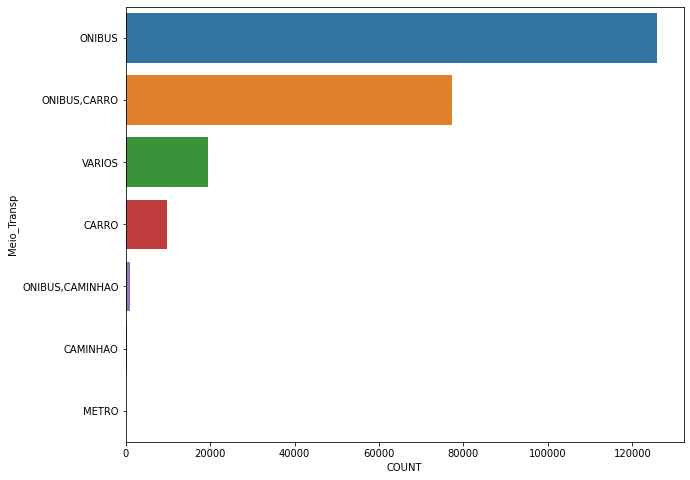

In [233]:
dfgraph = df_filtrado.groupby(['Meio_Transp']).size().reset_index(name = 'COUNT')
dfgraph = dfgraph.sort_values('COUNT')
dfgraph = dfgraph[dfgraph['COUNT'] > 100].sort_values('COUNT', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=dfgraph, x="COUNT", y="Meio_Transp", orient="h")

E qual o Meio de Comunicação mais usado pelos usuários dos serviços de odonto em 2022?

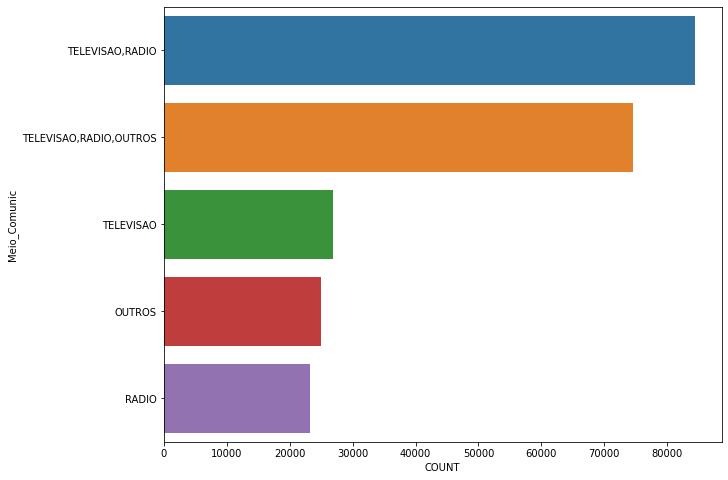

In [234]:
dfgraph = df_filtrado.groupby(['Meio_Comunic']).size().reset_index(name = 'COUNT')
dfgraph = dfgraph.sort_values('COUNT')
dfgraph = dfgraph[dfgraph['COUNT'] > 100].sort_values('COUNT', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=dfgraph, x="COUNT", y="Meio_Comunic", orient="h")

A Maioria da população do DataSet utiliza televisão e rádio como os principais meios de comunicação.

In [235]:
#Qual a quantidade de estrangeiros que utilizam serviços públicos de odontologia comparado com os brasileiros?
qtd_nac = df_filtrado['Nacionalidade'].value_counts()
qtd_nac

Brasileira       227597
Estrangeiro        6350
Naturalizado         47
Não informado        46
Name: Nacionalidade, dtype: int64

###Perguntas relacionadas aos Municípios/Bairros

Quais os municípios do DataSet que mais utilizam os serviços públicos de Odontologia?

In [236]:
qtd_muni = df_filtrado['Municipio'].value_counts()
qtd_muni

CURITIBA                233963
COLOMBO                     18
ARAUCARIA                   11
ALMIRANTE TAMANDARE          8
CAMPO LARGO                  6
FAZENDA RIO GRANDE           6
SAO JOSE DOS PINHAIS         5
PINHAIS                      5
GUARATUBA                    4
NAO INFORMADO                3
PIRAQUARA                    2
SANTANA DO ITARARE           2
SAO PAULO                    2
PONTAL DO PARANA             2
PIEN                         1
ANTONIO OLINTO               1
MORRETES                     1
Name: Municipio, dtype: int64

Curitiba é com certeza o município com mais participação nos serviços públicos de Odonto no DataSet

Quais os Bairros do DataSet que mais utilizam os serviços públicos de Odontologia?

In [237]:
qtd_bairro = df_filtrado['Bairro'].value_counts()
qtd_bairro

CIDADE INDUSTRIAL       33294
SITIO CERCADO           23178
CAJURU                  17184
UBERABA                 12794
TATUQUARA               12571
                        ...  
GUARANI                     1
JARDIM SAO FRANCISCO        1
PALOMA                      1
GUARITUBA                   1
TANGUA                      1
Name: Bairro, Length: 102, dtype: int64

###Perguntas relacionadas aos tipos de Unidades de serviços odontológicos

Qual é o tipo de unidade de saúde mais procurado para serviços de odontologia no ano de 2022?

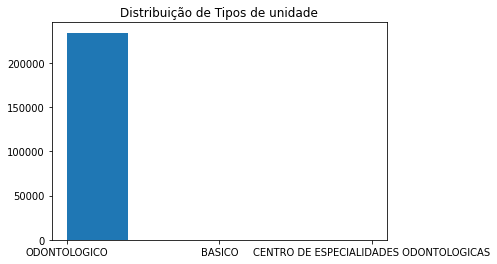

In [238]:
plt.hist(df_filtrado.Tipo_Unidade, bins=5, rwidth=1)
plt.title('Distribuição de Tipos de unidade')
plt.show()

In [239]:
qtd_muni = df_filtrado['Tipo_Unidade'].value_counts()
qtd_muni

ODONTOLOGICO                              233904
BASICO                                       128
CENTRO DE ESPECIALIDADES ODONTOLOGICAS         8
Name: Tipo_Unidade, dtype: int64

Com base no histograma e no contador, os serviços odontológicos do DataSet são realizado em quase todas as vezes em centros específicos de Odontologia.

E quais as Unidades que prestam serviços de Odonto mais requisitadas de 2022?

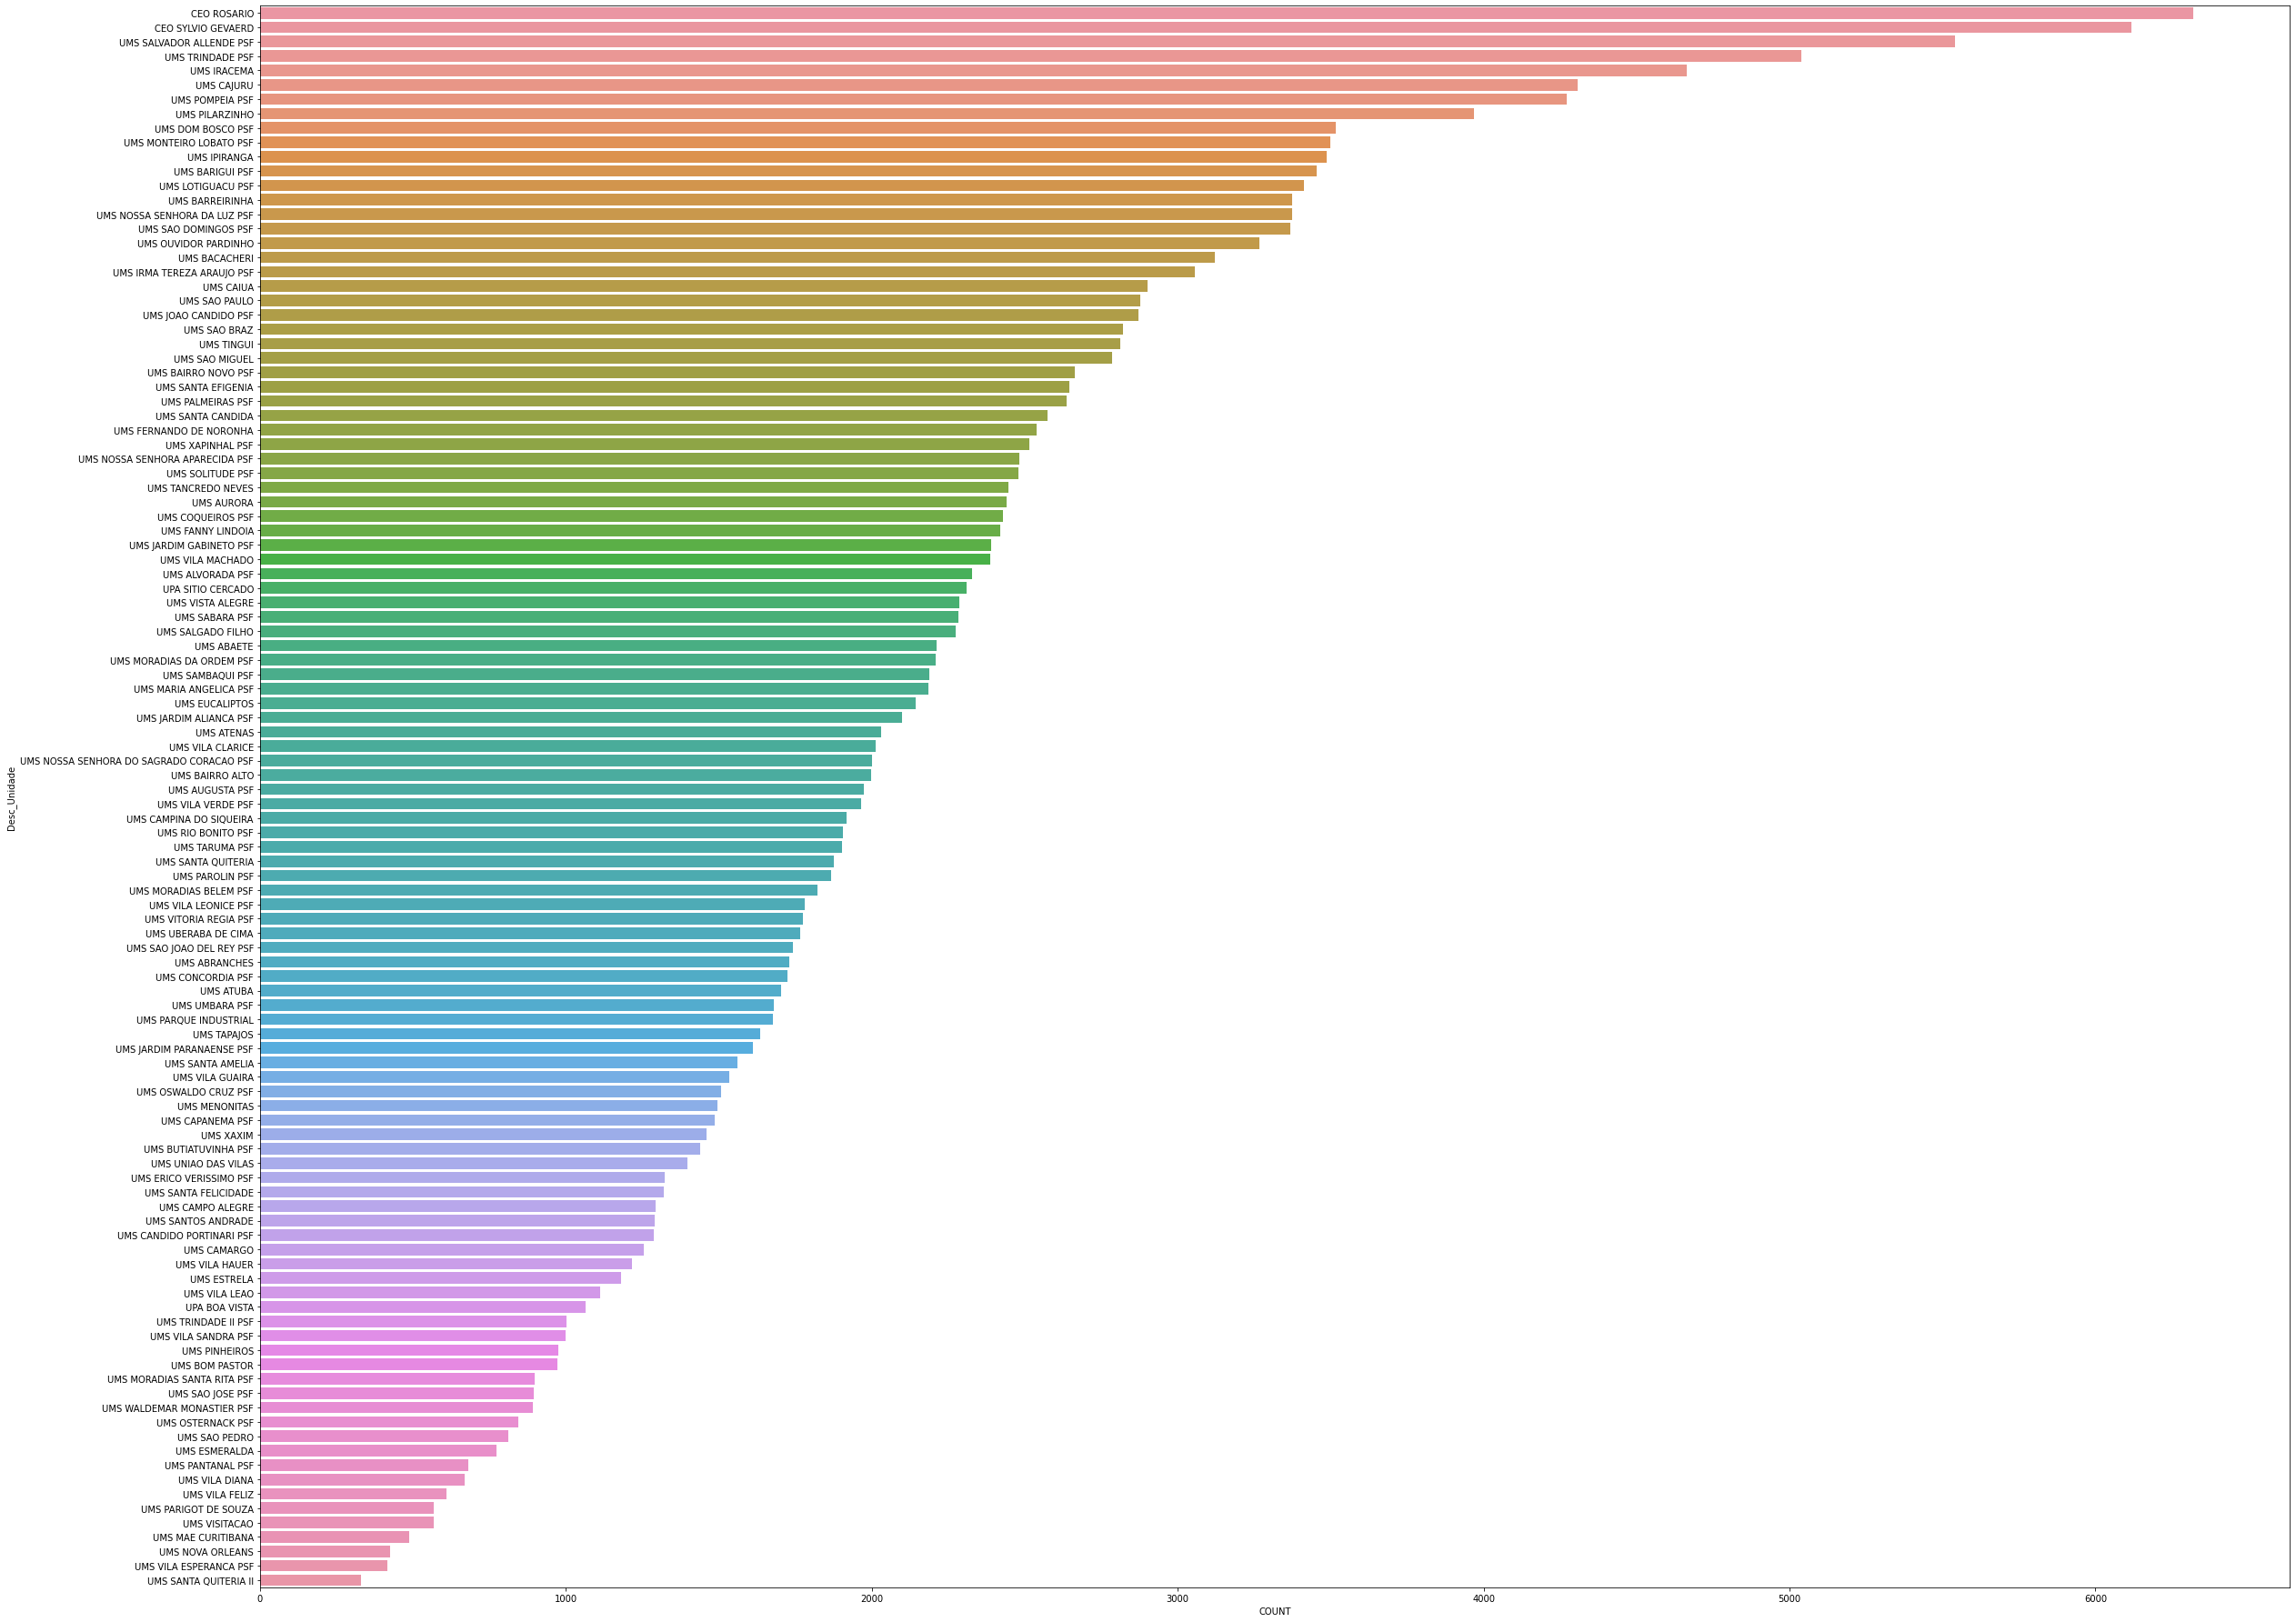

In [240]:
dfgraph = df_filtrado.groupby(['Desc_Unidade']).size().reset_index(name = 'COUNT')
dfgraph = dfgraph.sort_values('COUNT')
dfgraph = dfgraph[dfgraph['COUNT'] > 100].sort_values('COUNT', ascending=False)

plt.figure(figsize=(40,32))
sns.barplot(data=dfgraph, x="COUNT", y="Desc_Unidade", orient="h")

As unidades que mais prestam serviço são os Centros Especializados Odontológicos do Rosário e o Centro Especializado Odontológico Sylvio Gevaerd.

###Perguntas Gerais

Há mais pessoas que possuem Energia Elétrica utilizando os serviços públicos de odontologia ou pessoas que não possuem Energia Elétrica?

In [241]:
graf_eletricidade =  px.histogram (df_filtrado,  x = "Energia_Eletrica") 
graf_eletricidade.update_layout(width=500,height=500,title_text='Quantidade de pessoas com acesso a Energia Elétrica',
                      title_font_color = 'black') 
graf_eletricidade.show()

A Enorme maioria da população do DataSet possui Energia Elétrica.

Qual é o tipo de moradia mais comum das pessoas na amostragem?

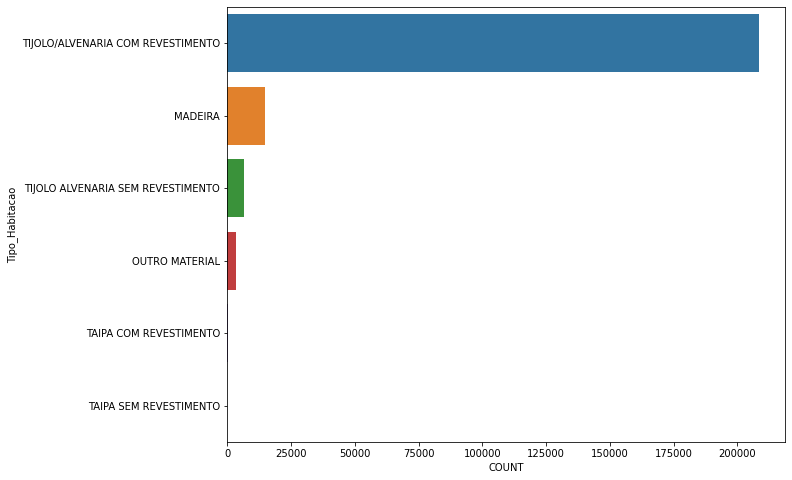

In [242]:
dfgraph = df_filtrado.groupby(['Tipo_Habitacao']).size().reset_index(name = 'COUNT')
dfgraph = dfgraph.sort_values('COUNT')
dfgraph = dfgraph[dfgraph['COUNT'] > 100].sort_values('COUNT', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=dfgraph, x="COUNT", y="Tipo_Habitacao", orient="h")

Qual o destino do lixo da população do DataSet? (Saneamento Básico e Higiene).

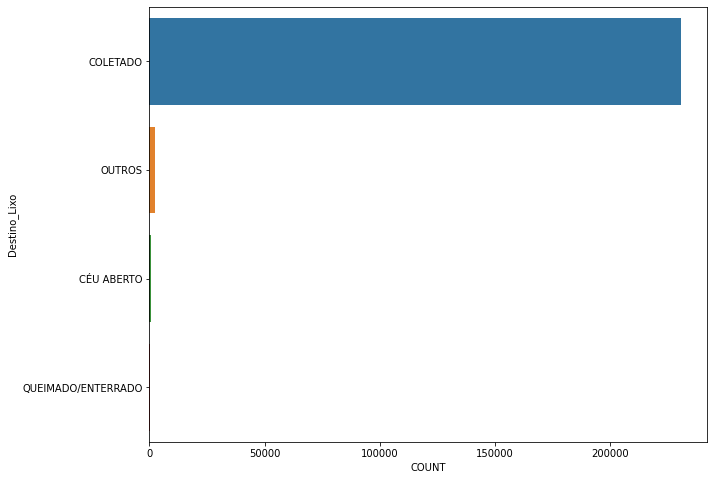

In [243]:
dfgraph = df_filtrado.groupby(['Destino_Lixo']).size().reset_index(name = 'COUNT')
dfgraph = dfgraph.sort_values('COUNT')
dfgraph = dfgraph[dfgraph['COUNT'] > 100].sort_values('COUNT', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=dfgraph, x="COUNT", y="Destino_Lixo", orient="h")

E qual o destino das necessidades fisiológicas das pessoas do DataSet? (Saneamento Básico e Higiene).

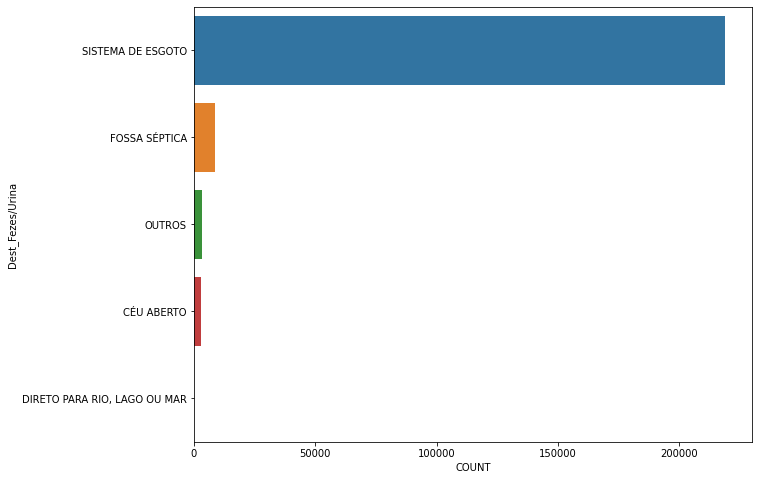

In [244]:
dfgraph = df_filtrado.groupby(['Dest_Fezes/Urina']).size().reset_index(name = 'COUNT')
dfgraph = dfgraph.sort_values('COUNT')
dfgraph = dfgraph[dfgraph['COUNT'] > 100].sort_values('COUNT', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=dfgraph, x="COUNT", y="Dest_Fezes/Urina", orient="h")

###Análise avançada: correlação, heatmap e testes de normalidade/hipóteses

Visualização da Quantidade de Cômodos nas moradias por sexo:

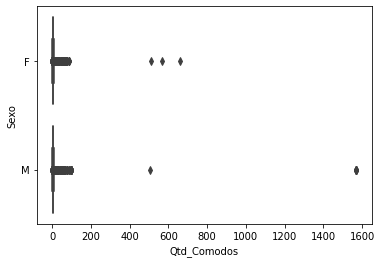

In [245]:
sns.boxplot(data=df_filtrado, x="Qtd_Comodos", y="Sexo")

Apóx utilizar o BoxPlot, é possível encontrar outliers que provavelmente são erros de digitação na quantidade de Cômodos

In [246]:
df_dropar =  df_filtrado[df_filtrado['Qtd_Comodos'] > 20]
df_dropar 

,Data_Atend,Data_Nasc,Sexo,Tipo_Unidade,Desc_Unidade,Desc_Procedimento,Desc_Prof,Exames,Qtd_Medic_Prescritos,Area_Atuacao,...,Energia_Eletrica,Tipo_Habitacao,Destino_Lixo,Dest_Fezes/Urina,Qtd_Comodos,Meio_Comunic,Meio_Transp,Municipio,Bairro,Nacionalidade
1350,2022-02-03,1997-03-28,M,ODONTOLOGICO,UMS BARREIRINHA,CURATIVO DE DEMORA C/ OU S/ PREPARO BIOMECANICO,CIRURGIAO DENTISTA,Nao,42,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,64,TELEVISAO,ONIBUS,CURITIBA,BARREIRINHA,Brasileira
5341,2022-07-03,1964-12-03,F,ODONTOLOGICO,UMS ATUBA,RESTAURACAO DENTARIA,CIRURGIAO DENTISTA,Nao,0,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,74,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,BAIRRO ALTO,Brasileira
9259,2022-09-03,2015-04-24,F,ODONTOLOGICO,UMS TAPAJOS,EXAME PARA DETECÇÃO DE LESÕES BUCAIS,CIRURGIAO DENTISTA,Nao,0,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,66,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,XAXIM,Brasileira
9260,2022-09-03,2015-04-24,F,ODONTOLOGICO,UMS TAPAJOS,CONSULTA/TELECONSULTA,CIRURGIAO DENTISTA,Nao,0,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,66,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,XAXIM,Brasileira
12780,2022-11-03,2016-07-22,M,ODONTOLOGICO,UMS TAPAJOS,PROFILAXIA / REMOCAO DA PLACA BACTERIANA,TECNICO EM SAUDE BUCAL,Nao,0,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,66,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,XAXIM,Brasileira
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245597,2022-04-20,1979-08-04,F,ODONTOLOGICO,UMS SALVADOR ALLENDE PSF,CONSULTA/TELECONSULTA,CIRURGIAO DENTISTA,Nao,36,Não informado,...,Sim,TIJOLO ALVENARIA SEM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,50,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,SITIO CERCADO,Brasileira
247553,2022-04-18,1955-06-16,F,ODONTOLOGICO,UMS MENONITAS,CONSULTA/TELECONSULTA,CIRURGIAO DENTISTA,Nao,0,AVALIAÇÃO ENDODONTIA,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,46,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,XAXIM,Brasileira
247598,2022-04-19,1964-12-03,F,ODONTOLOGICO,UMS ATUBA,CONSULTA/TELECONSULTA,CIRURGIAO DENTISTA,Nao,15,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,74,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,BAIRRO ALTO,Brasileira
247984,2022-04-05,2016-12-18,F,ODONTOLOGICO,UMS CAJURU,EVIDENCIACAO DE PLACA BACTERIANA,CIRURGIAO DENTISTA,Nao,0,Não informado,...,Sim,TAIPA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,53,"TELEVISAO,RADIO,OUTROS",ONIBUS,CURITIBA,CAJURU,Brasileira


In [247]:
#Remoção das linhas que possuem outliers após análise
df_filtrado = df_filtrado.drop(44398)
df_filtrado = df_filtrado.drop(49764)
df_filtrado = df_filtrado.drop(54864)
df_filtrado = df_filtrado.drop(54865)
df_filtrado = df_filtrado.drop(54866)
df_filtrado = df_filtrado.drop(163188)
df_filtrado = df_filtrado.drop(170910)
df_filtrado = df_filtrado.drop(182004)
df_filtrado = df_filtrado.drop(186532)
df_filtrado = df_filtrado.drop(186533)
df_filtrado = df_filtrado.drop(220191)
df_filtrado = df_filtrado.drop(229945)

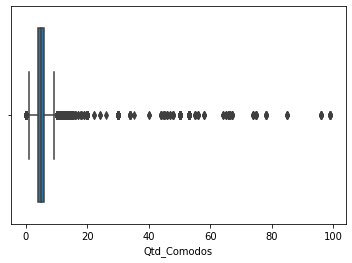

In [248]:
sns.boxplot(data=df_filtrado, x="Qtd_Comodos")

In [249]:
df_filtrado["Qtd_Comodos"].unique()

array([ 3,  5,  4,  7,  6, 10,  8,  1,  2, 11,  9, 16, 14, 64, 12, 15, 13,
       74, 20, 66, 18,  0, 58, 45, 30, 50, 56, 48, 75, 34, 44, 96, 78, 19,
       17, 46, 47, 65, 22, 40, 24, 55, 99, 53, 67, 85, 35, 26])

In [250]:
df_filtrado["Qtd_Comodos"].value_counts()

5     96904
6     47967
4     38881
3     15061
7     13293
8      9479
2      4088
10     2857
9      2415
1      1030
12      656
11      435
15      184
14      171
13      163
20       77
50       61
30       39
0        36
53       35
66       28
45       16
16       14
34       12
18       11
99       11
67        9
75        8
44        8
96        8
78        8
48        7
46        6
74        5
55        5
56        5
85        5
65        5
19        4
58        4
47        3
17        3
64        3
40        2
24        2
22        2
35        1
26        1
Name: Qtd_Comodos, dtype: int64

In [251]:
df_dropar20 =  df_filtrado[df_filtrado['Qtd_Comodos'] > 20]
df_dropar20 

,Data_Atend,Data_Nasc,Sexo,Tipo_Unidade,Desc_Unidade,Desc_Procedimento,Desc_Prof,Exames,Qtd_Medic_Prescritos,Area_Atuacao,...,Energia_Eletrica,Tipo_Habitacao,Destino_Lixo,Dest_Fezes/Urina,Qtd_Comodos,Meio_Comunic,Meio_Transp,Municipio,Bairro,Nacionalidade
1350,2022-02-03,1997-03-28,M,ODONTOLOGICO,UMS BARREIRINHA,CURATIVO DE DEMORA C/ OU S/ PREPARO BIOMECANICO,CIRURGIAO DENTISTA,Nao,42,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,64,TELEVISAO,ONIBUS,CURITIBA,BARREIRINHA,Brasileira
5341,2022-07-03,1964-12-03,F,ODONTOLOGICO,UMS ATUBA,RESTAURACAO DENTARIA,CIRURGIAO DENTISTA,Nao,0,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,74,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,BAIRRO ALTO,Brasileira
9259,2022-09-03,2015-04-24,F,ODONTOLOGICO,UMS TAPAJOS,EXAME PARA DETECÇÃO DE LESÕES BUCAIS,CIRURGIAO DENTISTA,Nao,0,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,66,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,XAXIM,Brasileira
9260,2022-09-03,2015-04-24,F,ODONTOLOGICO,UMS TAPAJOS,CONSULTA/TELECONSULTA,CIRURGIAO DENTISTA,Nao,0,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,66,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,XAXIM,Brasileira
12780,2022-11-03,2016-07-22,M,ODONTOLOGICO,UMS TAPAJOS,PROFILAXIA / REMOCAO DA PLACA BACTERIANA,TECNICO EM SAUDE BUCAL,Nao,0,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,66,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,XAXIM,Brasileira
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245597,2022-04-20,1979-08-04,F,ODONTOLOGICO,UMS SALVADOR ALLENDE PSF,CONSULTA/TELECONSULTA,CIRURGIAO DENTISTA,Nao,36,Não informado,...,Sim,TIJOLO ALVENARIA SEM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,50,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,SITIO CERCADO,Brasileira
247553,2022-04-18,1955-06-16,F,ODONTOLOGICO,UMS MENONITAS,CONSULTA/TELECONSULTA,CIRURGIAO DENTISTA,Nao,0,AVALIAÇÃO ENDODONTIA,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,46,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,XAXIM,Brasileira
247598,2022-04-19,1964-12-03,F,ODONTOLOGICO,UMS ATUBA,CONSULTA/TELECONSULTA,CIRURGIAO DENTISTA,Nao,15,Não informado,...,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,74,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,BAIRRO ALTO,Brasileira
247984,2022-04-05,2016-12-18,F,ODONTOLOGICO,UMS CAJURU,EVIDENCIACAO DE PLACA BACTERIANA,CIRURGIAO DENTISTA,Nao,0,Não informado,...,Sim,TAIPA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,53,"TELEVISAO,RADIO,OUTROS",ONIBUS,CURITIBA,CAJURU,Brasileira


In [252]:
#Remoção novamente das linhas que possuem outliers após uma segunda análise
df_filtrado = df_filtrado.drop(df_dropar20.index, axis=0)

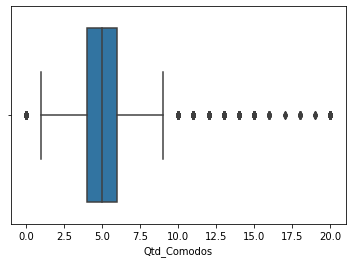

In [253]:
sns.boxplot(data=df_filtrado, x="Qtd_Comodos")

Após filtrar e tratar os outliers, é possível observar que a maioria das pessoas que solicitam serviços de odontologia possuem em torno de 5 cômodos em suas casas!

In [254]:
#Calculando a nova média de quantidade de cômodos
media_comodos2 = df_filtrado['Qtd_Comodos'].mean().round(1)
print('A média de cômodos é aproximadamente: ',media_comodos2)

A média de cômodos é aproximadamente:  5.2


In [255]:
#Calculando o desvio padrão da quantidade de cômodos
desv_cmd = df_filtrado['Qtd_Comodos'].std(axis= 0)
print('O desvio padrão da quantidade de cômodos é: \n', desv_cmd)

O desvio padrão da quantidade de cômodos é: 
 1.5333689438528089


Qual é a correlação entre as Unidades que oferecem atendimento Odontológico e os Serviços mais solicitados?

In [256]:
#Criando um dataframe novo utilizando crosstab
df_cross_servico = pd.crosstab(df_filtrado.Desc_Unidade, df_filtrado.Desc_Procedimento)
df_cross_servico.head(10)

Desc_Procedimento,ACESSO A POLPA DENTARIA E MEDICACAO (POR DENTE),ADAPTACAO DE PROTESE DENTARIA,ADEQUACAO DO COMPORTAMENTO DA PESSOA COM DEFICIENCIA,ADEQUACAO DO COMPORTAMENTO DE CRIANCAS,AFERICAO DE PRESSAO ARTERIAL,AFERICAO DE TEMPERATURA,AJUSTE OCLUSAL,APLICACAO DE CARIOSTATICO (POR DENTE),APLICACAO DE SELANTE (POR DENTE),APLICACAO TOPICA DE FLUOR (INDIVIDUAL POR SESSAO),...,SELAMENTO DE PERFURACAO RADICULAR,SELAMENTO PROVISORIO DE CAVIDADE DENTARIA,SESSAO DE ACUPUNTURA COM INSERCAO DE AGULHAS,SESSAO DE AURICULOTERAPIA,SESSÃO DE ANALGESIA RELATIVA COM ÓXIDO NITROSO E OXIGÊNIO,TESTE RAPIDO PARA DETECCAO DE SARS-COVID-2,TRATAMENTO ENDODONTICO,"TRATAMENTO INICIAL, LESIONAL OU CIRURGICO",ULOTOMIA/ULECTOMIA,VISITA DOMICILIAR
Desc_Unidade,,,,,,,,,,,,,,,,,,,,,
CEO ROSARIO,300,76,26,0,0,0,3,0,0,41,...,3,633,0,0,1,0,609,50,1,0
CEO SYLVIO GEVAERD,136,140,10,163,0,0,48,23,6,229,...,3,333,0,0,1,0,249,80,2,0
UMS ABAETE,44,2,1,4,0,0,7,7,0,186,...,0,153,0,0,0,0,2,3,0,0
UMS ABRANCHES,53,0,0,0,0,0,3,1,2,123,...,0,119,0,0,0,0,11,13,0,0
UMS ALVORADA PSF,71,1,0,3,1,0,11,0,0,105,...,0,199,0,0,0,0,7,24,2,7
UMS ATENAS,63,0,0,9,0,0,1,2,0,136,...,0,94,0,0,0,0,0,23,0,0
UMS ATUBA,61,0,0,1,0,0,0,0,0,96,...,0,102,0,0,0,0,0,11,0,0
UMS AUGUSTA PSF,92,0,0,1,0,0,4,0,0,119,...,0,170,0,0,0,0,4,75,0,1
UMS AURORA,63,1,0,0,0,0,10,0,14,102,...,0,142,0,0,0,0,1,7,0,0


In [257]:
#Criando um dataframe com a correlação
df_corr_serv = df_cross_servico.corr()
df_corr_serv

Desc_Procedimento,ACESSO A POLPA DENTARIA E MEDICACAO (POR DENTE),ADAPTACAO DE PROTESE DENTARIA,ADEQUACAO DO COMPORTAMENTO DA PESSOA COM DEFICIENCIA,ADEQUACAO DO COMPORTAMENTO DE CRIANCAS,AFERICAO DE PRESSAO ARTERIAL,AFERICAO DE TEMPERATURA,AJUSTE OCLUSAL,APLICACAO DE CARIOSTATICO (POR DENTE),APLICACAO DE SELANTE (POR DENTE),APLICACAO TOPICA DE FLUOR (INDIVIDUAL POR SESSAO),...,SELAMENTO DE PERFURACAO RADICULAR,SELAMENTO PROVISORIO DE CAVIDADE DENTARIA,SESSAO DE ACUPUNTURA COM INSERCAO DE AGULHAS,SESSAO DE AURICULOTERAPIA,SESSÃO DE ANALGESIA RELATIVA COM ÓXIDO NITROSO E OXIGÊNIO,TESTE RAPIDO PARA DETECCAO DE SARS-COVID-2,TRATAMENTO ENDODONTICO,"TRATAMENTO INICIAL, LESIONAL OU CIRURGICO",ULOTOMIA/ULECTOMIA,VISITA DOMICILIAR
Desc_Procedimento,,,,,,,,,,,,,,,,,,,,,
ACESSO A POLPA DENTARIA E MEDICACAO (POR DENTE),1.000000,0.323593,0.439308,0.134456,-0.019723,0.272548,0.231320,0.134661,0.008801,0.056423,...,0.373315,0.853233,0.000988,0.008381,0.373315,0.058851,0.458929,0.428983,0.157071,0.189176
ADAPTACAO DE PROTESE DENTARIA,0.323593,1.000000,0.714051,0.295905,-0.029291,-0.016574,0.369682,0.244455,0.010005,0.058685,...,0.952246,0.423514,0.004708,0.012589,0.952246,-0.016969,0.761140,0.246187,0.221395,-0.003217
ADEQUACAO DO COMPORTAMENTO DA PESSOA COM DEFICIENCIA,0.439308,0.714051,1.000000,0.199769,-0.006196,0.015601,0.126286,0.174856,0.047599,-0.022453,...,0.856725,0.540606,-0.019201,0.012538,0.856725,-0.023845,0.946352,0.256424,0.179953,-0.002660
ADEQUACAO DO COMPORTAMENTO DE CRIANCAS,0.134456,0.295905,0.199769,1.000000,-0.003195,0.001156,0.252778,0.823437,0.205809,0.088610,...,0.182028,0.167003,-0.024164,-0.012919,0.182028,-0.015439,0.090173,0.490797,0.136769,0.075823
AFERICAO DE PRESSAO ARTERIAL,-0.019723,-0.029291,-0.006196,-0.003195,1.000000,0.206795,0.038240,-0.052599,-0.018786,-0.060120,...,-0.024951,-0.011678,-0.022276,-0.023106,-0.024951,0.030572,-0.019554,-0.045399,-0.010496,0.004201
AFERICAO DE TEMPERATURA,0.272548,-0.016574,0.015601,0.001156,0.206795,1.000000,0.223958,-0.060793,-0.059495,-0.113273,...,-0.018349,0.063950,-0.016381,-0.025550,-0.018349,-0.012915,-0.018279,0.029902,-0.049594,-0.021443
AJUSTE OCLUSAL,0.231320,0.369682,0.126286,0.252778,0.038240,0.223958,1.000000,0.247381,0.018979,0.174623,...,0.280279,0.228950,-0.051464,-0.045489,0.280279,0.026646,0.139567,0.211724,0.054185,0.065452
APLICACAO DE CARIOSTATICO (POR DENTE),0.134661,0.244455,0.174856,0.823437,-0.052599,-0.060793,0.247381,1.000000,0.254718,0.099176,...,0.144505,0.130300,0.017446,-0.058138,0.144505,-0.030226,0.064581,0.469663,0.164673,0.070421
APLICACAO DE SELANTE (POR DENTE),0.008801,0.010005,0.047599,0.205809,-0.018786,-0.059495,0.018979,0.254718,1.000000,0.146446,...,-0.024368,0.033803,0.021367,0.060636,-0.024368,-0.017152,-0.042896,0.050397,0.013258,0.130501


In [258]:
#Gerando um Heatmap para ilustrar essas correlações
df_corr_serv = df_corr_serv.style.background_gradient(cmap="RdBu")
df_corr_serv

Desc_Procedimento,ACESSO A POLPA DENTARIA E MEDICACAO (POR DENTE),ADAPTACAO DE PROTESE DENTARIA,ADEQUACAO DO COMPORTAMENTO DA PESSOA COM DEFICIENCIA,ADEQUACAO DO COMPORTAMENTO DE CRIANCAS,AFERICAO DE PRESSAO ARTERIAL,AFERICAO DE TEMPERATURA,AJUSTE OCLUSAL,APLICACAO DE CARIOSTATICO (POR DENTE),APLICACAO DE SELANTE (POR DENTE),APLICACAO TOPICA DE FLUOR (INDIVIDUAL POR SESSAO),ASSISTENCIA DOMICILIAR POR EQUIPE MULTIPROFISSIONAL.,ATENDIMENTO COMUM OU DE URGENCIA,AVALIACAO NO GERAL,BIOPSIA,CAPEAMENTO PULPAR,CIMENTACAO DE PROTESE DENTARIA,CONSULTA/TELECONSULTA,CORRECAO DENTARIA,CURATIVO DE DEMORA C/ OU S/ PREPARO BIOMECANICO,DRENAGEM DE ABSCESSO,EVIDENCIACAO DE PLACA BACTERIANA,EXAME PARA DETECÇÃO DE LESÕES BUCAIS,EXCISAO,EXODONTIA,FRENECTOMIA/FRENOTOMIA.,GENGIVECTOMIA (POR SEXTANTE),GENGIVOPLASTIA (POR SEXTANTE),GLOSSORRAFIA,INSTALACAO DE PROTESE DENTARIA,INSTALACAO/MANUTENCAO DE APARELHO,MANTENEDOR DE ESPACO,MARSUPIALIZACAO DE CISTOS E PSEUDOCISTOS,MEDICAO DE ALTURA,MEDICAO DE PESO,MOLDAGEM DENTO-GENGIVAL P/ CONSTRUCAO DE PROTESE DENTARIA,ODONTOSECCAO / RADILECTOMIA / TUNELIZACAO,ORIENTACAO DE HIGIENE,PROFILAXIA / REMOCAO DA PLACA BACTERIANA,PULPOTOMIA DENTARIA,RADIOGRAFIA,RASPAGEM E ALISAMENTO,REEMBASAMENTO E CONSERTO DE PROTESE DENTARIA,REGISTRO DE EXAMES,REIMPLANTE E TRANSPLANTE DENTAL (POR ELEMENTO),REMOCAO DE DENTE RETIDO (INCLUSO / IMPACTADO),RESTAURACAO DENTARIA,RETIRADA DE CORPO ESTRANHO DA CAVIDADE AUDITIVA E NASAL,RETIRADA DE PONTOS DE CIRURGIAS (POR PACIENTE),SELAMENTO DE PERFURACAO RADICULAR,SELAMENTO PROVISORIO DE CAVIDADE DENTARIA,SESSAO DE ACUPUNTURA COM INSERCAO DE AGULHAS,SESSAO DE AURICULOTERAPIA,SESSÃO DE ANALGESIA RELATIVA COM ÓXIDO NITROSO E OXIGÊNIO,TESTE RAPIDO PARA DETECCAO DE SARS-COVID-2,TRATAMENTO ENDODONTICO,"TRATAMENTO INICIAL, LESIONAL OU CIRURGICO",ULOTOMIA/ULECTOMIA,VISITA DOMICILIAR
Desc_Procedimento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACESSO A POLPA DENTARIA E MEDICACAO (POR DENTE),1.000000,0.323593,0.439308,0.134456,-0.019723,0.272548,0.231320,0.134661,0.008801,0.056423,0.211348,0.556345,0.286543,0.383395,0.144528,0.350942,0.519575,0.393800,0.903275,0.450566,0.071240,0.153456,0.246062,0.506149,0.205235,0.427419,0.325435,0.021614,0.315794,0.160310,0.248585,0.117367,0.052344,-0.021182,0.275246,0.482242,0.102175,0.069352,0.399596,0.434037,0.401507,0.146676,0.117367,0.389026,0.413401,0.309616,-0.019432,0.432740,0.373315,0.853233,0.000988,0.008381,0.373315,0.058851,0.458929,0.428983,0.157071,0.189176
ADAPTACAO DE PROTESE DENTARIA,0.323593,1.000000,0.714051,0.295905,-0.029291,-0.016574,0.369682,0.244455,0.010005,0.058685,-0.010606,-0.084319,-0.013603,0.936158,-0.126209,-0.109361,0.472306,0.914373,0.103809,-0.044372,0.256044,-0.002516,0.359331,0.054455,0.952103,0.703166,0.842321,-0.016969,0.977109,0.197613,0.014848,0.873899,0.006108,-0.070106,0.986743,0.761252,-0.045468,0.019630,-0.008871,0.801281,0.645477,0.509831,0.873899,-0.021506,0.870592,-0.065162,-0.027057,-0.040129,0.952246,0.423514,0.004708,0.012589,0.952246,-0.016969,0.761140,0.246187,0.221395,-0.003217
ADEQUACAO DO COMPORTAMENTO DA PESSOA COM DEFICIENCIA,0.439308,0.714051,1.000000,0.199769,-0.006196,0.015601,0.126286,0.174856,0.047599,-0.022453,-0.023845,0.008061,0.089926,0.875851,-0.098017,-0.119544,0.416319,0.895096,0.153434,0.050891,0.204702,0.070834,0.560912,0.049761,0.514175,0.831413,0.665895,-0.023845,0.715234,0.405802,0.150288,0.324422,0.003743,-0.039516,0.640709,0.938403,-0.008807,-0.043921,0.121951,0.937667,0.509208,0.172928,0.324422,-0.048355,0.921811,-0.102876,-0.022584,0.013616,0.856725,0.540606,-0.019201,0.012538,0.856725,-0.023845,0.946352,0.256424,0.179953,-0.002660
ADEQUACAO DO COMPORTAMENTO DE CRIANCAS,0.134456,0.295905,0.199769,1.000000,-0.003195,0.001156,0.252778,0.823437,0.205809,0.088610,-0.019051,0.078166,0.076730,0.171077,0.066388,-0.003174,0.295514,0.157807,0.059170,0.040350,0.063871,0.096377,0.014838,0.209372,0.290703,0.125680,0.365673,-0.017245,0.470080,-0.022417,0.071242,0.275305,0.385413,-0.025

É possível observar via heatmap que existem alguns procedimentos com correlação mais alta, significando que eles são solicitados nas mesmas Unidades de Atendimento, dando a indicar que alguns estabelecimentos são altamente especializados em tipos de atendimentos semelhantes. 

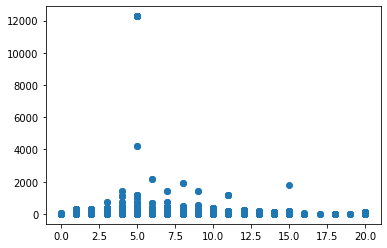

In [259]:
#Visualização das variáveis numéricas via Scatterplot para demonstração da dispersão
plt.scatter(df_filtrado['Qtd_Comodos'], df_filtrado['Qtd_Medic_Prescritos'],)

In [260]:
#Removendo os outliers da Coluna de Quantidade de Medicamentos
df_dropar5000 =  df_filtrado[df_filtrado['Qtd_Medic_Prescritos'] > 5000]
df_filtrado = df_filtrado.drop(df_dropar5000.index, axis=0)

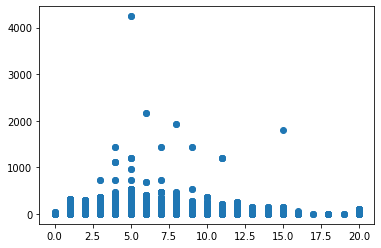

In [261]:
plt.scatter(df_filtrado['Qtd_Comodos'], df_filtrado['Qtd_Medic_Prescritos'])

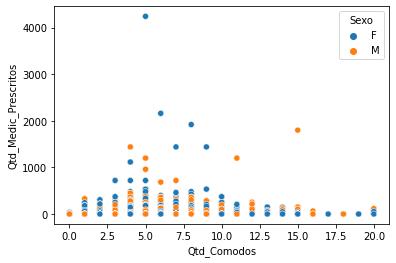

In [262]:
#Gerando o mesmo gráfico de dispersão, porém dividido por Sexo
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.scatterplot(data=df_filtrado, x=df_filtrado['Qtd_Comodos'], y=df_filtrado['Qtd_Medic_Prescritos'], hue=df_filtrado['Sexo'])

Após visualizar nos gráficos de dispersão, é possível notar que o perfil dos usuários de serviços públicos de odontologia é bem semelhante, tendo como maior diferença apenas a quantidade de medicamentos prescritos.

In [263]:
import scipy.stats as stats
import matplotlib.pyplot as plt

Teste de normalidade da Coluna "Quantidade de Cômodos" utilizando QQ plot

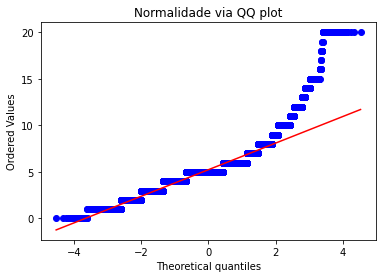

In [264]:
stats.probplot(df_filtrado['Qtd_Comodos'], dist="norm", plot=plt)
plt.title("Normalidade via QQ plot")
plt.show()

Teste de Hipótese: 

*   H0 - A varíavel de coluna de Quantidade de Cômodos segue uma distribuição normal

*   H1 - A variável não segue uma distribuição normal

Se o resultado for maior que 0,05 utilizando o teste de Shapiro ou o teste de KS, é possível afirmar que a distribuição da variável é normal.




Sabendo que há mais de 5000 dados no DataFrame, utilizamos o teste de KS para verificar a normalidade 

In [265]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
statsmodels.stats.diagnostic.lilliefors(df_filtrado.Qtd_Comodos, dist = 'norm')

(0.22819194471891752, 0.0009999999999998899)

Tendo o resultado maior que 0,05, é possível confirmar que a coluna de quantidade de cômodos possui a distribuição normal. Logo, a H0 se torna verdadeira.

###Conclusão Geral


*   Após a Análise Exploratória, é possível concluir que o perfil dos usuários dos serviços públicos de Odontologia em Curitiba e Região Metropolitana do ano de 2022 é bem semelhante. Os tipos das casas, quantidade de cômodos, energia elétrica, saneamento, meios de transporte e de comunicação reafirmam essa semelhança populacional.

*   Há uma maior participação feminina interessada nos serviços de saúde prestados.

*   A gama de procedimentos e serviços oferecidos é bem vasta e variada, mas tem como principal utilização as consultas/teleconsultas.

*   A utilização das unidades de saúde listadas é bem variada e a grande maioria possui bastante ocorrência, demonstrando que os usuários interessados realmente usam as US e Centros Odontológicos espalhados por Curitiba e região.

*   Os meses com mais atendimentos em 2022 foram Março, Abril e Maio, indicando que esta época do ano é a que a população mais procura com interesse em saúde dentária.

*   O DataSet possui poucas variáveis numéricas no geral, porém a que foi mais conveniente para a análise (Quantidade de Cômodos) foi testada e possui distribuição normal.

